# Police Brutality in USA

### Discovery: problemi e obiettivi

__PROBLEMI :__
- La storia americana è stata caratterizzata da una forte componente razzista, ad esempio fino agli anni '60 gli afroamericani sono stati costretti a vivere separatamente dai bianchi, senza alcun diritto di voto.
- La forte militarizzazione delle forze di polizia e la demonizzazione delle minoranze e delle classi sociali più svantaggiate, spesso associate alla criminalità, ha caratterizzato lo sviluppo di comportamenti estremamente violenti da parte degli ufficiali nei confronti dei cittadini, portando in molte occasioni alla morte degli stessi.

__OBIETTIVI :__
- Comprendere in quali anni ed in quali stati si è verificato un picco di casi di police burtality.
- Evidenziare se il contesto sociale ed etnico di appartenenza delle vittime influenzi i casi di morte per arma da fuoco risalenti alle forze di polizia.
- Analizzare i vari dipartimenti di polizia americani in base ai casi di morte per arma da fuoco in cui sono coinvolti.


_(__in questa EDA il termine "razza" verrà utilizzato facendo riferimento alla traduzione italiana della parola inglese "race", ossia come costrutto sociale__)_

***

### Data Selection

Le fonti scelte per questa EDA sono:

- __fpsd__: _"Fatal Police Shooting Data"_ dataset sui casi di omicido per arma da fuoco registrati dal Washington Post dal 2015 al 2024 (<a href="https://github.com/washingtonpost/data-police-shootings/blob/master/v2/fatal-police-shootings-data.csv">link)
    
- __police_ag__: _"Fatal Police Shooting agencies"_, dataset sui dipartimenti di polizia statunitensi (<a href="https://github.com/washingtonpost/data-police-shootings/blob/master/v2/fatal-police-shootings-agencies.csv">link)
    
- __uninsured_rate__: _"Uninsured people in USA 2015-2023"_,  percentuale di cittadini senza assicurazione sanitaria per stato dal 2015 al 2023 (<a href="https://data.census.gov/table/ACSST1Y2023.S2701t=Health%20Insurance&g=010XX00US$0400000&moe=false&tp=false">link)
    
- __poverty_rate__: _"USA perc below poverty 2015-2023"_,  percentuale di persone sotto la soglia di povertà per stato dal 2015 al 2023 (<a href="https://data.census.gov/table/ACSST1Y2023.S1701?t=Poverty&g=010XX00US$0400000">link)
    
- __education_rate__: _"USA perc over 25 completed H-school 2015-2023"_,  percentuale di completamento delle High School da 25 anni in su per stato dal 2015 al 2023 (<a href="https://data.census.gov/table/ACSST1Y2023.S1501?t=Educational%20Attainment&g=010XX00US$0400000&moe=false">link)  
- __usa_share__: _"USA sharerace 2015-2023"_ divisone della popolazione in gruppi etnici negli Stati Uniti dal 2015 al 2023 (<a href="https://data.census.gov/table/ACSDP1Y2015.DP05?q=Hispanic%20or%20Latino&hidePreview=false">link)

- __usa_states_share__: _"USA states share race 2015-2023"_,  divisone della popolazione in razze nei singoli stati degli USA dal 2015 al 2023 (<a href="https://data.census.gov/table/ACSDP1Y2023.DP05?q=Hispanic%20or%20Latino&g=010XX00US$0400000&moe=false&tp=false">link)
    
- __states_population__: _"USA states population 2015-2023"_, la popolazione degli USA per stato (<a href="https://www.census.gov/data/datasets/time-series/demo/popest/2010s-state-total.html#par_textimage_500989927">link.1, <a href="https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-total.html">link.2)
    
- __states_abb__: _"USA states abbreviation"_, le sigle degli stati negli USA associate ai nomi (<a href="https://www.kaggle.com/datasets/doyouevendata/state-abbreviations">link)
    
- __usa_map__: mappa degli USA per creare grafici attraverso Geopandas(<a href="https://hub.arcgis.com/datasets/1b02c87f62d24508970dc1a6df80c98e/explore?location=39.084773%2C-106.619592%2C3.74">link)

In [1]:
import pandas as pd 
import geopandas as gpd
import datetime
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

fpsd = pd.read_csv('../Project/Data/fatal-police-shootings-data.csv')

police_ag = pd.read_csv('../Project/Data/fatal-police-shootings-agencies.csv')

uninsured_rate = pd.read_csv('../Project/Data/Uninsured people in USA 2015-2023.csv')

poverty_rate = pd.read_csv('../Project/Data/USA perc below poverty 2015-2023.csv')

education_rate = pd.read_csv('../Project/Data/USA perc over 25 completed H-school 2015-2023.csv')

usa_share = pd.read_csv('../Project/Data/USA sharerace 2015-2023.csv')

usa_states_share = pd.read_csv('../Project/Data/USA states share race 2015-2023.csv')

states_population = pd.read_csv('../Project/Data/USA states population 2015-2023.csv')

states_abb = pd.read_csv('../Project/Data/USA_state_abbrev.csv')

usa_map = gpd.read_file('../Project/Data/Usa Map/cb_2018_us_state_20m.shp')

***

### Data Cleaning

#### 1 - Controllo sui duplicati nei vari dataset

#### 2 - Nel dataset "fpsd" :

- formattazione della colonna 'date' in formato 'datetime'
- creazione delle colonne 'year' e 'month_name' per analisi annuali e mensili sulle time-series
- la colonna 'county' presenta molti valori mancanti, non essendo funzionale all'analisi verrà eliminata
- le colonne 'race_source' e 'location_precision' non sono funzionali all'analisi e verranno eliminate
- cambio dell'ordine delle colonne per aumentare la leggibilità del dataset

##### 3 - Nel dataset "police_ag" :

- la colonna _'oricode'_ verrà eliminata, in quanto non necessaria all'analisi
- conversione della colonna 'id' in formato stringa 
- creazione di una copia '_c_fpsd_' del dataset '_fpsd_' dividendo gli id dei dipartimenti di polizia accorpati nella colonna 'agency_ids' e creando nuove righe con un singolo id
- __fspd_ag__: join tra '_c_fpsd_' e fpsd_ag per associare i casi di morte per arma da fuoco con il dipartimento di polizia a cui appartengono i poliziotti coinvolti
- riordinamento delle colonne del nuovo dataset

#### 4 - Nei dataset states_abb e states_population:

- esclusione della colonna vuota nel dataset '_states_abb_'
- la colonna _'Unnamed: 0'_ viene denominata _'States'_
- __population__: join tra i due dataset '_states_abb_' e '_states_population_' per poter svolgere delle join con gli altri dataset

#### 5 - Nel dataset "usa_states_share":

- __states_share__: join per aggiungere al dataset usa_states_share le sigle degli stati e poter svolgere join con gli altri dataset

#### 6 - Nei dataset "education_rate" , "usa_share" , "usa_states_share", "poverty_rate" e "uninsured_rate":

- elimino la colonna vuota 'Unnamed: 0' contenente il duplicato dell'index

#### 7 - Nei dataset "education_rate" e "poverty_rate":

- aggiungo la colonna per le sigle degli stati con una join a entrambi i dataset da '_states_abb_'
- elimino i dati mancanti risalenti al 'Puerto Rico' in entrambi i dataset perchè non utili per l'analisi

In [2]:
# Step 1
datasets = {'police_ag':police_ag, 'fpsd':fpsd, 'uninsured_rate':uninsured_rate, 
            'poverty_rate':poverty_rate,'education_rate':education_rate,'usa_share':usa_share,
            'usa_states_share':usa_states_share,'states_population':states_population,
            'states_abb':states_abb}

for name,dataset in datasets.items():
    if dataset.duplicated().any() == True:
        print(name,': any duplicates')
    else:
        print(name,': no duplicates')

police_ag : no duplicates
fpsd : no duplicates
uninsured_rate : no duplicates
poverty_rate : no duplicates
education_rate : no duplicates
usa_share : no duplicates
usa_states_share : no duplicates
states_population : no duplicates
states_abb : no duplicates


In [3]:
# Step 2_________________________________________________________________________________________________________________________
fpsd.date = pd.to_datetime(fpsd.date)
fpsd['year'] = fpsd.date.dt.year
fpsd['month'] = fpsd.date.dt.month_name()
fpsd['month'] = pd.Categorical(fpsd['month'],categories=['January', 'February', 'March', 'April', 
                                                         'May', 'June', 'July','August', 
                                                         'September', 'October', 'November', 'December'],ordered=True)
fpsd = fpsd.drop(['county','race_source','location_precision'],axis=1,errors='ignore')
fpsd = fpsd[['id','date','year','month','state','city','name','gender','age','race','threat_type',
           'flee_status', 'armed_with','was_mental_illness_related', 'body_camera',
           'agency_ids','latitude','longitude']]

# Step 3_________________________________________________________________________________________________________________________
police_ag = police_ag.drop('oricodes',axis=1,errors='ignore')
police_ag['id'] = police_ag['id'].astype(str)

 #creazione della copia di fpsd per separare gli id accorpati
c_fpsd=fpsd.copy()
c_fpsd.agency_ids = c_fpsd.agency_ids.str.split(';')
c_fpsd = c_fpsd.explode('agency_ids')
c_fpsd.agency_ids = c_fpsd.agency_ids.astype(str)

 #creazione del dataset "fspd_ag" con una join tra i due dataset('c_fpsd' & 'police_ag')
fpsd_ag = pd.merge(c_fpsd, police_ag, how='left', left_on ='agency_ids', right_on ='id').drop(['state_y','id_y','id_x'],axis=1)
fpsd_ag = fpsd_ag.rename({'name_x':'name','state_x':'state','name_y':'agency_name'}, axis=1)
fpsd_ag = fpsd_ag[['date','year', 'month', 'state', 'city', 'name', 'gender', 'age', 'race', 'threat_type',
                   'flee_status', 'armed_with', 'was_mental_illness_related','body_camera', 
                   'agency_ids', 'agency_name','type', 'total_shootings', 'latitude', 'longitude']]

# Step 4_________________________________________________________________________________________________________________________
states_abb = states_abb.drop('Unnamed: 2',axis=1,errors='ignore')
states_population = states_population.drop('Unnamed: 0',axis=1,errors='ignore')

 #creazione del dataset 'population' con una join tra i due dataset('states_abb' & 'states_population')
population = pd.merge(left=states_population,right=states_abb)
population = population[['Abbreviation','State','2015','2016','2017','2018','2019','2020','2021','2022','2023']]

# Step 5_________________________________________________________________________________________________________________________
states_share = pd.merge(left=usa_states_share,right=states_abb,on='State')
states_share = states_share[['State','Abbreviation','Year','H','W','B','N','A','O']]

# Step 6_________________________________________________________________________________________________________________________
poverty_rate = poverty_rate.drop('Unnamed: 0', axis=1, errors='ignore')
usa_share = usa_share.drop('Unnamed: 0', axis=1, errors='ignore')
usa_states_share = usa_states_share.drop('Unnamed: 0', axis=1, errors='ignore')
education_rate = education_rate.drop('Unnamed: 0', axis=1, errors='ignore')
uninsured_rate = uninsured_rate.drop('Unnamed: 0', axis=1, errors='ignore')

# Step 7_________________________________________________________________________________________________________________________
education_rate = education_rate.merge(states_abb,how='left',left_on='state',right_on='State').drop('State',axis=1,errors='ignore')
education_rate = education_rate.drop('Abbreviation_y',axis=1,errors='ignore').rename(columns={'Abbreviation_x':'Abbreviation'})
education_rate = education_rate[['state','Abbreviation','year','High school graduate (includes equivalency)']]
education_rate = education_rate.dropna()

poverty_rate = poverty_rate.merge(states_abb,how='left',left_on='state',right_on='State').drop('State',axis=1,errors='ignore')
poverty_rate = poverty_rate.drop('Abbreviation_y',axis=1,errors='ignore').rename(columns={'Abbreviation_x':'Abbreviation'})
poverty_rate = poverty_rate[['state','Abbreviation','year','pop_below_poverty']]
poverty_rate = poverty_rate.dropna()

uninsured_rate = uninsured_rate.merge(states_abb,how='left',left_on='state',right_on='State')
uninsured_rate = uninsured_rate.drop(['State','Abbreviation_y'],axis=1,errors='ignore').rename(columns={'Abbreviation_x':'Abbreviation'})
uninsured_rate = uninsured_rate[['state','Abbreviation','year','Population','W','B','N','A','O','H']]
uninsured_rate = uninsured_rate.dropna()

***

### Data Exploration

Rispetto al numero dei casi di omicidio per arma da fuoco commessi dalla polizia negli Stati Uniti dal 2015 al 2023: 
- il picco è stato raggiunto nel 2023
- l'anno con meno casi è il 2016
- ad un primo esame sembra che la razza più colpita dal 2015 al 2023 sia quella dei bianchi

In [4]:
# conteggio delle vittime di fpsd per razza, escludendo il 2024
W_count = fpsd.loc[(fpsd.race=='W')&(fpsd.year!=2024)].year.value_counts().sort_index()
B_count = fpsd.loc[(fpsd.race=='B')&(fpsd.year!=2024)].year.value_counts().sort_index()
H_count = fpsd.loc[(fpsd.race=='H')&(fpsd.year!=2024)].year.value_counts().sort_index()
N_count = fpsd.loc[(fpsd.race=='N')&(fpsd.year!=2024)].year.value_counts().sort_index()
A_count = fpsd.loc[(fpsd.race=='A')&(fpsd.year!=2024)].year.value_counts().sort_index()
O_count = fpsd.loc[(fpsd.race=='O')&(fpsd.year!=2024)].year.value_counts().sort_index()

# esclusione dell'anno 2024 e creazione del dataset cases_x_year con il conteggio delle vittime annuali per razza
cases_x_year = fpsd.loc[fpsd.year!=2024].year.value_counts().sort_index()
cases_x_year =cases_x_year.reset_index().rename(columns={'count':'Total'})

cases_x_year['White'] = W_count.values
cases_x_year['Black'] = B_count.values
cases_x_year['Hispanic'] = H_count.values
cases_x_year['Asian'] = N_count.values
cases_x_year['Native'] = A_count.values
cases_x_year['Other'] = O_count.values

cases_x_year.style.bar(subset=['Total'], color='indianred')

,year,Total,White,Black,Hispanic,Asian,Native,Other
0,2015,995,505,258,176,10,17,10
1,2016,959,473,239,168,18,19,2
2,2017,984,464,227,191,22,17,2
3,2018,991,475,236,181,16,26,1
4,2019,994,432,254,170,13,27,3
5,2020,1020,467,248,175,9,15,2
6,2021,1050,483,252,154,14,13,1
7,2022,1095,457,254,155,15,17,2
8,2023,1163,476,246,160,12,19,5


- nell'83% dei casi dal 2015 al 2024 la bodycam dei poliziotti coinvolti era spenta

In [5]:
round(fpsd.body_camera.value_counts(normalize=True).reset_index(),2)

,body_camera,proportion
0,False,0.83
1,True,0.17


- nell'80% dei casi dal 2015 al 2024 le vittime non presentavano problemi di salute mentale

In [6]:
round(fpsd.was_mental_illness_related.value_counts(normalize=True).reset_index(),2)

,was_mental_illness_related,proportion
0,False,0.8
1,True,0.2


- le vittime disarmate nel 50% dei casi sono decedute mentre non erano in fuga
- rispetto alla popolazione totale di casi divisa per razza, le vittime che non erano in fuga e non erano armate sono appartenenti per la maggior parte alle categorie "Other" e neri/afroamericani
- la categoria dei bianchi presenta la percentuale minore rispetto a tutte le altre

In [7]:
# creazione del dataset unarmed_cases per verificare la percentuale di vittime disarmate decedute mentre non erano in fuga
unarmed_cases = round(fpsd.loc[fpsd['armed_with']=='unarmed'].flee_status.value_counts(normalize=True).reset_index(),2)
unarmed_cases = unarmed_cases.rename(columns={'flee_status':'unarmed_flee_status'})

# divisione dei casi in cui la vittima era ferma e disarmata per razza e proporzione con il totale dei casi per razza
unarmed_notmove_cases_by_race = fpsd.loc[(fpsd['armed_with']=='unarmed')&(fpsd['flee_status']=='not')].race.value_counts()
cases_by_race = fpsd.race.value_counts()
unarmed_notmoved_perc =((unarmed_notmove_cases_by_race/cases_by_race)*100).sort_values(ascending=False).reset_index().dropna()

display(HTML(f'<div style="display: flex;">'
             f'<div style="margin-right: 50px;">{unarmed_cases.to_html()}</div>'
             f'<div style="margin-right: 30px;">{unarmed_notmoved_perc.to_html()}</div>'
             f'</div>'))

,unarmed_flee_status,proportion
0,not,0.50
1,foot,0.23
2,car,0.21
3,other,0.06
,race,count
0,O,11.764706
1,B,3.055672
2,H,2.967898
3,N,2.877698
4,A,2.793296


Ad un primo esame, tra tutti gli stati degli USA, la __California__ mantiene il primato dal 2015 al 2023 per il __più alto numero  di casi__

In [8]:
# funzione per creare un dataset che divida il totale dei casi di omicidio per stato dal 2015 al 2024
def higher_fpsd_cases_instates(select):  
    df = pd.DataFrame()
    for year in fpsd.year.unique()[:-1]:
        df[f'{year}'] = fpsd.loc[fpsd['year']==year].state.value_counts(dropna=True)
    # i dati nulli vengono trasformati in 0 per poter trasformare la colonna in formato 'int'
    df.fillna(0,inplace=True)
    df = df.astype(int)
    answer = df.loc[df[select]==df[select].max(),select]
    return(answer.reset_index())

# iterazione degli anni presenti nel dataset fpsd per selezionare per ogni anno lo stato che ha il numero di casi maggiore 
for years in fpsd.year.unique()[:-1]:
    states = higher_fpsd_cases_instates(f'{years}')['state'].to_string(index=False)
    cases = higher_fpsd_cases_instates(f'{years}')[f'{years}'].to_string(index=False)
    print(f'- lo stato con il maggior numero di casi nel {years} è {states} con {cases} casi')

- lo stato con il maggior numero di casi nel 2015 è CA con 190 casi
- lo stato con il maggior numero di casi nel 2016 è CA con 139 casi
- lo stato con il maggior numero di casi nel 2017 è CA con 160 casi
- lo stato con il maggior numero di casi nel 2018 è CA con 116 casi
- lo stato con il maggior numero di casi nel 2019 è CA con 135 casi
- lo stato con il maggior numero di casi nel 2020 è CA con 147 casi
- lo stato con il maggior numero di casi nel 2021 è CA con 141 casi
- lo stato con il maggior numero di casi nel 2022 è CA con 129 casi
- lo stato con il maggior numero di casi nel 2023 è CA con 137 casi


- La maggior parte dei casi di omicidio per arma da fuoco commessi dalla polizia in __California__ dal 2015 al 2023, coinvolgono vittime di __razza ispanica__

In [9]:
CA_cases_by_race=pd.DataFrame()

# iterazione tra gli anni del dataset fpsd per il conteggio annuale delle vittime divise per razza
for year in fpsd.year.unique():
    CA_cases_by_race[f'{year}'] = fpsd.loc[(fpsd.year==year)&(fpsd.state=='CA')].race.value_counts()

CA_cases_by_race.fillna(0,inplace=True)
CA_cases_by_race = CA_cases_by_race.astype(int)
CA_cases_by_race 

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
race,,,,,,,,,,
H,77,60,74,53,46,59,56,47,46,25
W,60,44,44,30,34,37,26,20,28,18
B,34,22,22,20,24,24,20,14,17,6
A,9,5,4,4,9,5,2,6,6,2
O,6,0,1,0,0,0,1,0,1,2


Il 61% dei casi di omicidio per arma da fuoco dal 2015 al 2024 vedono coinvolti __dipartimenti di polizia locale__

In [10]:
round(fpsd_ag.type.value_counts(normalize=True).reset_index(),2)

,type,proportion
0,local_police,0.61
1,sheriff,0.28
2,state_police,0.07
3,federal,0.03
4,local_other,0.01
5,state_other,0.00
6,other,0.00


- Il dipartimento di polizia con più casi a suo carico dal 2015 al 2023 risulta essere quello di __Los Angeles__

In [11]:
fpsd_ag[['state','agency_name']].value_counts().head().reset_index().rename(columns={'count':'fatal shooting cases'})

,state,agency_name,fatal shooting cases
0,CA,Los Angeles Police Department,141
1,AZ,Phoenix Police Department,120
2,CA,Los Angeles County Sheriff's Department,116
3,TX,Houston Police Department,84
4,NY,New York Police Department,79


- I dipartimenti con più casi per singoli anni sono:

   - il __Los Angeles Police Department__ tra il 2015 ed il 2017
   - il __Phoenix Police Department__ tra il 2018 ed 2019
   - il __Los Angeles County Sheriff's Department__ nel 2020
   - l'__U.S. Marshals Service__ tra il 2021 ed il 2023
   
(Analizzare i casi per lo stato di appartenenza dei dipartimenti coinvolti porterà ad un risultato diverso per il periodo tra il 2021 ed il 2023: essendo l'U.S. Marshals Service un ente federale, i casi che lo coinvolgono si localizzano in diversi stati a contrario degli altri dipartimenti, risultando singolarmente inferiori ai casi in cui il Los Angeles Police Department è coinvolto in quegli anni nel proprio stato di appartenenza)

In [12]:
# il dataset dep_fpsd_x_year presenta i dipartimenti di polizia divisi per nome ed il conteggio delle vittime
dep_fpsd_x_year = fpsd_ag.groupby('agency_name').year.value_counts().unstack().reset_index()
dep_fpsd_x_year = dep_fpsd_x_year.fillna(0)

# il ciclo for itera gli anni dei casi di fpsd sul dataset dep_fpsd_x_year per selezionare i dipartimenti con più casi
print(' - casi per dipartimento','\n')
for year in fpsd.year.unique()[:-1]:
    department = dep_fpsd_x_year.loc[dep_fpsd_x_year[year]==dep_fpsd_x_year[year].max(),'agency_name'].to_string(index=False)
    cases = dep_fpsd_x_year.loc[dep_fpsd_x_year[year]==dep_fpsd_x_year[year].max(),year].astype(int).to_string(index=False)
    
    if department[0] in ['A','E','I','O','U']:
        print(f"nel {year} il dipartimento con più casi è l'{department} con {cases} casi")
    else:
        print(f"nel {year} il dipartimento con più casi è il {department} con {cases} casi")

#___________________________________________________________________________________________________________________________

print('\n\n','- casi per dipartimento e stato di appartenenza:','\n')

# la variabile viene modificata per aggiungere la colonna che identifica lo stato di appartenenza
dep_fpsd_x_year = fpsd_ag.groupby(['agency_name','state']).year.value_counts().unstack().reset_index()
dep_fpsd_x_year = dep_fpsd_x_year.fillna(0)

# il ciclo for itera gli anni dei casi di fpsd come in precedenza, aggiungengdo gli stati di appartenenza dei dipartimenti
for year in fpsd.year.unique()[:-1]:
    department = dep_fpsd_x_year.loc[dep_fpsd_x_year[year]==dep_fpsd_x_year[year].max(),'agency_name'].to_string(index=False)
    cases = dep_fpsd_x_year.loc[dep_fpsd_x_year[year]==dep_fpsd_x_year[year].max(),year].astype(int).to_string(index=False)
    states = dep_fpsd_x_year.loc[dep_fpsd_x_year[year]==dep_fpsd_x_year[year].max(),'state'].to_string(index=False)
    
    if department[0] in ['A','E','I','O','U']:
        print(f"nel {year} il dipartimento con più casi è l'{department} con {cases} casi (Stato: {states})")
    else:
        print(f"nel {year} il dipartimento con più casi è il {department} con {cases} casi (Stato: {states})")

 - casi per dipartimento 

nel 2015 il dipartimento con più casi è il Los Angeles Police Department con 21 casi
nel 2016 il dipartimento con più casi è il Los Angeles Police Department con 19 casi
nel 2017 il dipartimento con più casi è il Los Angeles Police Department con 15 casi
nel 2018 il dipartimento con più casi è il Phoenix Police Department con 21 casi
nel 2019 il dipartimento con più casi è il Phoenix Police Department con 12 casi
nel 2020 il dipartimento con più casi è il Los Angeles County Sheriff's Department con 17 casi
nel 2021 il dipartimento con più casi è l'U.S. Marshals Service con 22 casi
nel 2022 il dipartimento con più casi è l'U.S. Marshals Service con 22 casi
nel 2023 il dipartimento con più casi è l'U.S. Marshals Service con 16 casi


 - casi per dipartimento e stato di appartenenza: 

nel 2015 il dipartimento con più casi è il Los Angeles Police Department con 21 casi (Stato: CA)
nel 2016 il dipartimento con più casi è il Los Angeles Police Department con 19 ca

Per verificare la correlazione tra la percentuale di persone sotto la soglia di povertà ed i casi di police brutality:

gli stati che dal 2015 al 2023 hanno mantenuto una percentuale più alta di cittadini sotto la soglia di povertà rispetto alla media sono:

- il __Mississipi__ (_poverty_rate_ tra 18% e 22% )
- il __Louisiana__ (_poverty_rate_ tra 18% e 19%)
- il __New Mexico__ (_poverty_rate_ tra 17% e 20% )

In [13]:
max_poverty_rate=[]

# iterazione per anno
for year in fpsd.year.unique()[:-1]:
    # gli stati vengono ordinati per percentuale di cittadini sotto la soglia di povertà, selezionando i primi 10
    result = poverty_rate.loc[poverty_rate.year==year].sort_values(by='pop_below_poverty',ascending=False)
    result = result[['Abbreviation','year','pop_below_poverty']].reset_index().drop('index',axis=1).head(10)
    # l'indice numerico viene aumentato di 1 per rappresentare in modo più chiaro la condizione degli stati per anno
    result.index+=1
    result = result.rename(columns={'Abbreviation':year}).drop('year',axis=1)
    # i dati dell'iterazione sono inseriti in un dataset e concatenati
    max_poverty_rate.append(result)
    
max_poverty_rate_10statehigh = pd.concat(max_poverty_rate,axis=1).T

# dataset con media delle percentuali di cittadini sotto la soglia di povertà dal 2015 al 2023 per stato
mean_poverty_rate = poverty_rate.groupby('state')['pop_below_poverty'].mean().sort_values(ascending=False).reset_index()
mean_poverty_rate = mean_poverty_rate.rename(columns={'pop_below_poverty':'mean_poverty_rate'})
mean_poverty_rate.index+=1

display(HTML(f'<div style="display: flex;">'
             f'<div style="margin-right: 50px;">{max_poverty_rate_10statehigh.to_html()}</div>'
             f'<div style="margin-right: 30px;">{mean_poverty_rate.head(10).to_html()}</div>'
             f'</div>'))

,1,2,3,4,5,6,7,8,9,10
2015,MS,NM,LA,AR,KY,AL,WV,AZ,DC,GA
pop_below_poverty,0.22,0.204,0.196,0.191,0.185,0.185,0.179,0.174,0.173,0.17
2016,MS,LA,NM,DC,KY,WV,AR,AL,AZ,OK
pop_below_poverty,0.208,0.202,0.198,0.186,0.185,0.179,0.172,0.171,0.164,0.163
2017,MS,NM,LA,WV,KY,AL,DC,AR,OK,SC
pop_below_poverty,0.198,0.197,0.197,0.191,0.172,0.169,0.166,0.164,0.158,0.154
2018,MS,NM,LA,WV,AR,KY,AL,DC,OK,SC
pop_below_poverty,0.197,0.195,0.186,0.178,0.172,0.169,0.168,0.162,0.156,0.153
2019,MS,LA,NM,KY,AR,WV,AL,OK,TN,SC
pop_below_poverty,0.196,0.19,0.182,0.163,0.162,0.16,0.155,0.152,0.139,0.138


- tra gli stati che hanno mantenuto un'alta percentuale di persone sotto la soglia di povertà dal 2015 al 2023 solo il __New Mexico__ presenta una media più alta di casi di "fatal police shooting" rispetto agli altri. 

In [14]:
# conteggio dei casi per stato divisi per anno e media annuale
year_mean_cases = fpsd.groupby('year').state.value_counts().reset_index()
year_mean_cases = year_mean_cases.groupby('year')['count'].mean().reset_index().rename(columns={'count':'mean_cases'})

# casi divisi per anno degli stati con il maggior tasso di povertà tra il 2015 ed il 2023
mis_cases = fpsd.loc[fpsd.state=='MS'].groupby('year').state.value_counts().reset_index().drop('state',
                                                                             axis=1).rename(columns={'count':'Mississippi'})
lou_cases = fpsd.loc[fpsd.state=='LA'].groupby('year').state.value_counts().reset_index().drop('state',
                                                                               axis=1).rename(columns={'count':'Louisiana'})
newm_cases = fpsd.loc[fpsd.state=='NM'].groupby('year').state.value_counts().reset_index().drop('state',
                                                                              axis=1).rename(columns={'count':'New Mexico'})

# join tra i 4 dataset per il confronto
result_poverty = year_mean_cases.merge(mis_cases,on='year').merge(lou_cases,on='year').merge(newm_cases,on='year')
result_poverty_mean = round(result_poverty[['mean_cases','Mississippi','Louisiana','New Mexico']].mean(),
                                                                          2).reset_index().rename(columns={'index':'',0:''})

display(HTML(f'<div style="display: flex;">'
             f'<div style="margin-right: 50px;">{result_poverty.to_html()}</div>'
             f'<div style="margin-right: 30px;">{result_poverty_mean.to_html()}</div>'))

,year,mean_cases,Mississippi,Louisiana,New Mexico
0,2015,19.900000,8,27,20
1,2016,18.803922,8,19,21
2,2017,19.680000,17,19,21
3,2018,19.820000,10,15,20
4,2019,20.285714,18,19,18
5,2020,20.816327,10,20,16
6,2021,20.588235,22,22,26
7,2022,21.470588,13,19,30
8,2023,22.803922,16,20,22
9,2024,16.160000,13,12,18


Per verificare la correlazione tra la percentuale di scolarizzazione degli stati ed i casi di police brutality:

gli stati che dal 2015 al 2023 hanno mantenuto una bassa percentuale di cittadini scolarizzati rispetto alla media sono:

- __District of Columbia__ (_education_rate_ tra 17% e 13%)
- __California__ (_education_rate_ intorno al 20%)
- __Colorado__ (_education_rate_ intorno al 20%)


In [15]:
min_education_rate=[]
for year in fpsd.year.unique()[:-1]:
    # gli stati vengono ordinati per percentuale più bassa di scolarizzazione, selezionando i primi 10
    result = education_rate.loc[education_rate.year==year].sort_values(by='High school graduate (includes equivalency)')
    result = result[['Abbreviation','year','High school graduate (includes equivalency)']].reset_index().drop('index',axis=1).head(10)
    # l'indice numerico viene aumentato di 1 per rappresentare in modo più chiaro la condizione degli stati per anno
    result.index+=1
    result = result.rename(columns={'Abbreviation':year}).drop('year',axis=1)
    # i dati dell'iterazione sono inseriti in un dataset e concatenati
    min_education_rate.append(result)
    
min_education_rate_10statelow = pd.concat(min_education_rate,axis=1).T
min_education_rate_10statelow = min_education_rate_10statelow.rename(index={'High school graduate (includes equivalency)':'High school graduate'})

# dataset con media delle percentuali di scolarizzazione più basse dal 2015 al 2023 per stato
mean_education_rate = education_rate.groupby('state')['High school graduate (includes equivalency)'].mean().sort_values().reset_index()
mean_education_rate = mean_education_rate.rename(columns={'High school graduate (includes equivalency)':'mean_education_rate'})
mean_education_rate.index+=1

display(HTML(f'<div style="display: flex;">'
             f'<div style="margin-right: 50px;">{min_education_rate_10statelow.to_html()}</div>'
             f'<div style="margin-right: 30px;">{mean_education_rate.head(10).to_html()}</div>'
             f'</div>'))

,1,2,3,4,5,6,7,8,9,10
2015,DC,CA,CO,WA,OR,UT,AZ,VA,MD,MA
High school graduate,0.174,0.208,0.217,0.231,0.234,0.242,0.245,0.246,0.251,0.252
2016,DC,CA,CO,WA,UT,OR,AZ,VA,MA,TX
High school graduate,0.178,0.205,0.22,0.223,0.227,0.229,0.239,0.24,0.245,0.252
2017,DC,CA,CO,WA,UT,OR,AZ,VA,MA,MD
High school graduate,0.172,0.208,0.213,0.221,0.223,0.232,0.241,0.242,0.243,0.245
2018,DC,CA,CO,WA,OR,UT,MA,AZ,VA,MN
High school graduate,0.166,0.207,0.208,0.217,0.222,0.226,0.233,0.24,0.24,0.242
2019,DC,CA,CO,WA,OR,UT,VA,AZ,MA,MN
High school graduate,0.158,0.206,0.21,0.221,0.23,0.231,0.236,0.237,0.239,0.244


- tra gli stati che hanno mantenuto una __bassa percentuale di scolarizzazione__ dal 2015 al 2023, la __California__ ed il __Colorado__ presentano una __media di casi__ di "fatal police shooting" __molto superiore__ rispetto alla media

In [16]:
# casi divisi per anno degli stati con il minor tasso di scolarizzazione tra il 2015 ed il 2023
dis_cases = fpsd.loc[fpsd.state=='DC'].groupby('year').state.value_counts().reset_index().drop('state',
                                                                    axis=1).rename(columns={'count':'District of Columbia'})
cal_cases = fpsd.loc[fpsd.state=='CA'].groupby('year').state.value_counts().reset_index().drop('state',
                                                                    axis=1).rename(columns={'count':'California'})
col_cases = fpsd.loc[fpsd.state=='CO'].groupby('year').state.value_counts().reset_index().drop('state',
                                                                    axis=1).rename(columns={'count':'Colorado'})

# join tra i 4 dataset per il confronto
result_education = year_mean_cases.merge(dis_cases,on='year').merge(cal_cases,on='year').merge(col_cases,on='year')
result_education_mean = round(result_education[['mean_cases','District of Columbia','California','Colorado']].mean(),
                                                                          2).reset_index().rename(columns={'index':'',0:''})

display(HTML(f'<div style="display: flex;">'
             f'<div style="margin-right: 50px;">{result_education.to_html()}</div>'
             f'<div style="margin-right: 30px;">{result_education_mean.to_html()}</div>'))

,year,mean_cases,District of Columbia,California,Colorado
0,2015,19.900000,4,190,29
1,2016,18.803922,5,139,31
2,2017,19.680000,2,160,31
3,2018,19.820000,1,116,46
4,2019,20.285714,1,135,36
5,2020,20.816327,1,147,42
6,2021,20.588235,7,141,41
7,2022,21.470588,3,129,40
8,2023,22.803922,4,137,41
9,2024,16.160000,2,77,25


Per confrontare la differenza nei casi di police brutality tra stati con più o meno persone con assicurazione sanitaria:

- il __Texas__ mantiene il primato dal 2015 al 2023 come stato con il maggior numero di persone senza assicurazione sanitaria
- il __Massachusetts__ mantiene il primato dal 2015 al 2023 come stato con il minor numero di persone senza assicurazione sanitaria

In [17]:
print('Percentuale più alta di persone senza assicurazione sanitaria:')
# iterazione per ordinare ed estrarre lo stato con il minor numero di cittadini con assicurazione sanitaria
for year in fpsd.year.unique()[:-1]:
    high_rate = uninsured_rate.loc[uninsured_rate.year==year].sort_values(by='Population',ascending=False).head(1)
    high_rate = high_rate[['year','state','Population']]

    first_state = high_rate['state'].to_string(index=False)
    first_perc = (high_rate['Population']*100).to_string(index=False)

    print(f" {year}: {first_state} ({first_perc}%)")
#_____________________________________________________________________________________________________________________________________

print('\n')
print('Percentuale più bassa di persone senza assicurazione sanitaria:')
# iterazione per ordinare ed estrarre lo stato con il maggior numero di cittadini con assicurazione sanitaria
for year in fpsd.year.unique()[:-1]:
    low_rate = uninsured_rate.loc[uninsured_rate.year==year].sort_values(by='Population',ascending=False).tail(1)
    low_rate = low_rate[['year','state','Population']]

    last_state = low_rate['state'].to_string(index=False)
    last_perc = (low_rate['Population']*100).to_string(index=False)
 
    print(f" {year}: {last_state} ({last_perc}%)")


Percentuale più alta di persone senza assicurazione sanitaria:
 2015: Texas (17.1%)
 2016: Texas (16.6%)
 2017: Texas (17.3%)
 2018: Texas (17.7%)
 2019: Texas (18.4%)
 2020: Texas (17.3%)
 2021: Texas (18.0%)
 2022: Texas (16.6%)
 2023: Texas (16.4%)


Percentuale più bassa di persone senza assicurazione sanitaria:
 2015: Massachusetts (2.8%)
 2016: Massachusetts (2.5%)
 2017: Massachusetts (2.8%)
 2018: Massachusetts (2.8%)
 2019: Massachusetts (3.0%)
 2020: Massachusetts (2.7%)
 2021: Massachusetts (2.5%)
 2022: Massachusetts (2.4%)
 2023: Massachusetts (2.6%)


- in Texas la maggior parte di persone senza assicurazione sanitaria dal 2015 al 2023 fa parte dei gruppi:
    - __Other__
    - __Hispanic__
    - __Native__

In [18]:
# dataset che raccoglie la percentuale di cittadini senza assicurazione in Texas
texas_uninsured = uninsured_rate.loc[uninsured_rate.state=='Texas',['year','W','B','N','A','O','H']].set_index('year').T

race_uninsured=[]
# iterazione per estrarre per anno la percentuala di cittadini senza assicurazione, divisi per razza
for year in fpsd.year.unique()[:-1]:  
    race = texas_uninsured[year].sort_values(ascending=False).reset_index()
    race_uninsured.append(race)

# raggruppamento delle iterazioni in un dataset, il cui indice ordina i dati rispetto alle categorie più colpite
race_uninsured_by_year = pd.concat(race_uninsured,axis=1).rename(columns={'index':'race'})
race_uninsured_by_year.index+=1
race_uninsured_by_year

,race,2015,race,2016,race,2017,race,2018,race,2019,race,2020,race,2021,race,2022,race,2023
1,O,0.459,O,0.439,O,0.531,O,0.519,O,0.607,O,0.506,O,0.494,O,0.585,O,0.511
2,H,0.273,H,0.263,H,0.269,H,0.273,H,0.286,H,0.268,H,0.280,N,0.264,H,0.256
3,N,0.206,N,0.206,N,0.235,N,0.205,N,0.206,N,0.216,N,0.274,H,0.259,N,0.218
4,W,0.169,W,0.164,W,0.170,W,0.175,W,0.181,W,0.164,B,0.156,B,0.143,B,0.136
5,B,0.149,B,0.138,B,0.150,B,0.152,B,0.150,B,0.150,W,0.121,W,0.111,W,0.114
6,A,0.115,A,0.112,A,0.111,A,0.110,A,0.113,A,0.112,A,0.095,A,0.087,A,0.095


- in Massachusetts la maggior parte di persone senza assicurazione sanitaria dal 2015 al 2023 fa parte dei gruppi:
    - __Other__
    - __Hispanic__
    - __Native__

In [19]:
# dataset che raccoglie la percentuale di cittadini senza assicurazione in Massachusetts
massa_uninsured = uninsured_rate.loc[uninsured_rate.state=='Massachusetts',['year','W','B','N','A','O','H']].set_index('year').T

race_uninsured=[]
# iterazione per estrarre per anno la percentuala di cittadini senza assicurazione, divisi per razza
for year in fpsd.year.unique()[:-1]:  
    race = massa_uninsured[year].sort_values(ascending=False).reset_index()
    race_uninsured.append(race)

# raggruppamento delle iterazioni in un dataset, il cui indice ordina i dati rispetto alle categorie più colpite
race_uninsured_by_year = pd.concat(race_uninsured,axis=1).rename(columns={'index':'race'})
race_uninsured_by_year.index+=1
race_uninsured_by_year

,race,2015,race,2016,race,2017,race,2018,race,2019,race,2020,race,2021,race,2022,race,2023
1,O,0.067,O,0.118,O,0.075,O,0.063,O,0.246,O,0.161,O,0.061,N,0.123,O,0.069
2,N,0.058,N,0.077,H,0.055,H,0.053,N,0.071,H,0.056,B,0.052,O,0.062,H,0.050
3,H,0.053,H,0.054,B,0.048,N,0.047,H,0.058,N,0.045,H,0.048,H,0.043,N,0.039
4,B,0.046,B,0.038,A,0.036,B,0.043,B,0.049,B,0.043,N,0.039,B,0.034,B,0.036
5,A,0.036,A,0.028,N,0.025,A,0.031,W,0.025,A,0.029,A,0.028,A,0.023,A,0.031
6,W,0.024,W,0.021,W,0.023,W,0.023,A,0.025,W,0.022,W,0.017,W,0.018,W,0.019


***

### Data Transformation

In rapporto alla popolazione degli USA annuale dal 2015 al 2023:

- il 2023 rimane l'anno che registra una frequenza di casi più alta rispetto agli altri
- come visto in precedenza il 2016 ha sempre la frequenza più bassa di casi

In [20]:
usa_pop = population[['Abbreviation','2015', '2016', '2017', '2018', '2019', '2020','2021', '2022', '2023']].set_index('Abbreviation')
# popolazione cumulativa degli USA con una somma su tutti gli stati
usa_pop = usa_pop.sum().reset_index().rename(columns={'index':'year',0:'tot_population'})
usa_pop['year'] = usa_pop['year'].astype(int)

# casi raggruppati per anno
cases_x_year = fpsd.year.value_counts().sort_index().reset_index()

# unione dei due dataset per poter svolgere la proporzione dei casi in base alla popolazione dell'anno di riferimento
fpsd_pop_prop = cases_x_year.merge(usa_pop,on='year').rename(columns={'count':'cases'})
# proporzione svolta su 1 milione di abitanti
fpsd_pop_prop['cases_prop'] = (fpsd_pop_prop['cases']/fpsd_pop_prop['tot_population'])*1000000
fpsd_pop_prop

,year,cases,tot_population,cases_prop
0,2015,995,320635163,3.103215
1,2016,959,322941311,2.969580
2,2017,984,324985539,3.027827
3,2018,991,326687501,3.033480
4,2019,994,328239523,3.028276
5,2020,1020,331526933,3.076673
6,2021,1050,332048977,3.162184
7,2022,1095,333271411,3.285610
8,2023,1163,334914895,3.472524


Un'analisi più approfondita dimostra come in relazione ai campioni della popolazione per razza:
- i bianchi non sono il campione più colpito da questo fenomeno, in quanto, in relazione alla numerosità del campione di appartenenza, la frequenza dei casi in ogni anno è costantemente inferiore a 1
- i gruppi più colpiti sono i nativi americani e i neri/afroamericani, con la media di frequenze più alta dal 2015 al 2023

In [21]:
# il dataset viene trasposto per poter dividere i casi per razza per le percentuali per razza di popolazione
usa_share_transpose = usa_share.T
usa_share_transpose.columns = usa_share_transpose.iloc[0]
usa_share_transpose = usa_share_transpose.drop('race')
usa_share_transpose.index.name='year'

cases_x_year_perc = pd.DataFrame()
# iterazione per estrarre le percentuali di vittime per fpsd, divise per razza e anno ed inserirl in 'cases_x_year_perc'
for year in usa_share_transpose.index:
    cases_x_year_perc[year] = fpsd.loc[fpsd.year==int(year)].race.value_counts(normalize=True).reset_index().set_index('race').rename(columns={'proportion':f'{year}'})
    
cases_x_year_perc = cases_x_year_perc.T
cases_x_year_perc = cases_x_year_perc[['H', 'W', 'B', 'N', 'A', 'O']]
cases_x_year_perc.index.name = 'year'
cases_x_year_perc = cases_x_year_perc

# dataset con la proporazione tra i casi in percentuale per razza e la popolazione in percentuale per razza
year_cases_freq = (cases_x_year_perc/usa_share_transpose).astype(float).round(2)

# media tra le percentuali di vittime per razza tra il 2015 ed il 2023
year_cases_freq_mean = year_cases_freq.mean().reset_index().rename(columns={0:'mean_freq'})
year_cases_freq_mean = year_cases_freq_mean.sort_values(by='mean_freq',ascending=False).reset_index().drop('index',axis=1)

display(HTML(f'<div style="display: flex;">'
             f'<div style="margin-right: 100px;">{year_cases_freq.to_html()}</div>'
             f'<div style="margin-right: 30px;">{year_cases_freq_mean.round(2).to_html()}</div>'
             f'</div>'))

race,H,W,B,N,A,O
year,,,,,,
2015,1.02,0.84,2.15,1.71,0.33,2.56
2016,1.03,0.84,2.11,2.80,0.38,0.54
2017,1.14,0.83,2.00,3.41,0.33,0.43
2018,1.06,0.84,2.05,2.44,0.50,0.21
2019,1.03,0.80,2.28,2.07,0.54,0.67
2020,1.02,0.88,2.24,1.40,0.28,0.44
2021,0.89,0.90,2.32,3.05,0.25,0.14
2022,0.90,0.88,2.37,3.33,0.32,0.28
2023,0.90,0.91,2.27,2.61,0.35,0.68


Nei casi di "fatal police shooting" dal 2015 al 2023 in cui le body camera delle forze di polizia erano inattive e le vittime erano disarmate:

- la percentuale di vittime appartenenti alla razza __nera/afroamericana__ oscilla tra il 3% ed il 12%
- la percentuale di vittime appartenenti alla razza __ispanica__ oscilla tra il 3% ed il 10%
- la percentuale di vittime appartenenti alla razza __bianca__ oscilla tra l'1% ed il 5%

In [22]:
# funzione per creare ulteriori dataset da fpsd e modificarli automaticamente
def bc_race_cases(period,bc_on_off):
    bc_race = fpsd.loc[(fpsd.body_camera==bc_on_off)&(fpsd.year==period)&(fpsd.armed_with=='unarmed')].groupby('race').body_camera.value_counts()
    bc_race = bc_race.reset_index()
    bc_race = bc_race.rename(columns={'count':'no_bc_unarmed'})
    
    # conteggio dei casi per razza e per anno
    race_year_cases=fpsd.loc[fpsd.year==period].groupby('year').race.value_counts().reset_index().rename(columns={'count':'tot_cases'})
    
    #join tra conteggio dei casi spefici per anno e per razza e conteggio dei casi totali per anno e per razza 
    spec_tot_cases_prop = bc_race.merge(race_year_cases,on='race').drop('year',axis=1)
    # proporzione tra casi specifici e casi totali per razza
    spec_tot_cases_prop['freq'] = round((spec_tot_cases_prop['no_bc_unarmed']/spec_tot_cases_prop['tot_cases'])*100,1)
    return spec_tot_cases_prop.sort_values(by='freq',ascending=False)

# visualizzazione delle tabelle su una griglia 3x3 con iterazione per gli anni in esame nel dataset fpsd
html_tables1=[]
years = fpsd.year.unique()[:-1]
for year in years:
    html_df1 = f'<div style="margin: 20px;">'
    html_df1 += f'<h4 style="text-align: center;"> {year} </h4>'
    html_df1 += bc_race_cases(year,False)[['race','no_bc_unarmed','tot_cases','freq']].sort_values(by='freq',ascending=False).to_html(index=False)
    html_df1 += '</div>'
    html_tables1.append(html_df1)
    
        
html_vis1 = '<div style="display: flex; flex-wrap: wrap; justify-content: space-around;">'   
html_vis1 += ''.join(html_tables1)     
html_vis1 += '</div>' 
display(HTML(html_vis1))

race,no_bc_unarmed,tot_cases,freq
O,3,10,30.0
B,33,258,12.8
H,19,176,10.8
N,1,10,10.0
W,26,505,5.1
race,no_bc_unarmed,tot_cases,freq
B,15,239,6.3
H,10,168,6.0
A,1,19,5.3
W,24,473,5.1


Il rapporto tra i casi di "fatal police shooting" e la popolazione di ogni stato dimostra che la California non ha in realtà il primato per il maggior numero di casi in proporzione alla propria popolazione.

A contario gli stati con una maggiore incidenza di questo fenomeno per anno sono:

- il __Wyoming__ nel 2015 e nel 2022
- l'__Alaska__ tra il 2016 ed il 2017  e nel 2020
- il __New Mexico__ nel 2018, nel 2021 e nel 2023


In [23]:
pop_reduced = population[['Abbreviation','2015','2016','2017','2018','2019','2020','2021','2022','2023']]
pop_reduced = pop_reduced.set_index('Abbreviation').T.stack().reset_index().rename(columns={'level_0':'year',
                                                                                            'Abbreviation':'state',
                                                                                            0:'population'})
pop_reduced['year'] = pop_reduced['year'].astype(int)

# conteggio delle vittime per anno, divise per stato
states_cases_year = fpsd.groupby('year').state.value_counts().reset_index().sort_values(by=['year','state'])
states_cases_year = states_cases_year.reset_index().drop('index',axis=1).rename(columns={'count':'fpsd_cases'})

#escludo dati 2024 per l'assenza dei dati corrispettivi nel dataset population
states_cases_year = states_cases_year.drop(states_cases_year.loc[states_cases_year.year==2024].index)

# join tra casi per anno, per stato e popolazione divisa per anno e per stato
pop_cases_proportion = states_cases_year.merge(pop_reduced,on=['state','year'])
# proporzione su 100000 abitanti
pop_cases_proportion['pop_cases_prop'] = (pop_cases_proportion['fpsd_cases']/pop_cases_proportion['population'])*100000

print('stati con il più alto numero di casi in proporzione alla popolazione annuale:')
# iterazione in cui i valori sono ordinati e viene estratto lo stato con la proporazione più alta tra casi e popolazione
for year in fpsd.year.unique()[:-1]:
    states_prop = pop_cases_proportion.loc[pop_cases_proportion.year==year].sort_values(by='pop_cases_prop',
                                                                                        ascending=False).head(1)
    state = states_prop['state'].to_string(index=False)
    prop = round(states_prop['pop_cases_prop'],2).to_string(index=False)
    
    print(f"{year}: {state}, proporzione:{prop} ogni 100 mila abitanti")

stati con il più alto numero di casi in proporzione alla popolazione annuale:
2015: WY, proporzione:1.02 ogni 100 mila abitanti
2016: AK, proporzione:1.08 ogni 100 mila abitanti
2017: AK, proporzione:1.08 ogni 100 mila abitanti
2018: NM, proporzione:0.96 ogni 100 mila abitanti
2019: AK, proporzione:0.96 ogni 100 mila abitanti
2020: AK, proporzione:1.23 ogni 100 mila abitanti
2021: NM, proporzione:1.23 ogni 100 mila abitanti
2022: WY, proporzione:1.72 ogni 100 mila abitanti
2023: NM, proporzione:1.04 ogni 100 mila abitanti


- Dividendo la percentuale di casi per razza con la popolazione divisa per razza dal 2015 al 2023 in ogni stato con la frequenza di casi più alta è possibile notare:

    - negli anni __2017__,__2018__,__2019__,__2021__,__2022__ la razza __nera/afroamericana__ ha la frequenza più alta di morti per colpo da arma da fuoco commessi dalla polizia negli stati con il maggior numero di casi per anno
    - nella maggior parte dei casi la razza bianca ha una frequenza minore rispetto alle altre razze o molto inferiore a quelle più colpite da questo fenomeno

In [24]:
# funzione per isolare la percentuale di vittime per razza di uno stato per l'anno selezionato
def states_max_prop(state,year):
    # percentuale di casi divisa per razze rispetto allo stato e all'anno selezionato
    perc_cases = fpsd.loc[(fpsd.state==state)&(fpsd.year==year)].race.value_counts(normalize=True).reset_index()
    # popolazione percentuale divisa in razze e anno
    perc_pop_race = states_share.loc[(states_share.Abbreviation==state)&(states_share['Year']==year)].T.reset_index()
    
    # il codice unisce i due dataset precedenti per proporzionare i casi divisi per razza per la popolazione percentuale
    race_states_max_prop = perc_cases.merge(perc_pop_race,left_on='race',right_on='index').drop('index',axis=1)
    race_states_max_prop = race_states_max_prop.rename(columns={'proportion':'perc_cases',race_states_max_prop.columns[-1]:'perc_pop'})
    race_states_max_prop['freq'] = race_states_max_prop['perc_cases']/race_states_max_prop['perc_pop']
    return race_states_max_prop


html_tables=[]
# riprendo lo script precedente per iterare gli stati con la frequenza più alta di casi e l'anno di misurazione
years = fpsd.year.unique()[:-1]
for year in years:
    states_prop = pop_cases_proportion.loc[pop_cases_proportion.year==year].sort_values(by='pop_cases_prop',ascending=False).head(1)
    state = states_prop['state'].to_string(index=False)
    html_df = f'<div style="margin: 10px;">'
    # inserimento nelle tabelle del titolo corrispondente al nome dello stato con più casi nell'anno corrispondente
    html_df += f'<h4 style="text-aling: center;">{state} - {year}</h4>'
    # la funzione creata precedentemente viene utilizzata per rilevare i dati degli stati selezionati nello script precedente
    html_df += states_max_prop(state, year).sort_values(by='freq',ascending=False).to_html(index=False)
    html_df += '</div>'
    html_tables.append(html_df)

html_vis = '<div style="display: flex; flex-wrap: wrap; justify-content: space-around;">'
html_vis += ''.join(html_tables)
html_vis += '</div>'
display(HTML(html_vis)) 

race,perc_cases,perc_pop,freq
N,0.166667,0.021,7.936508
W,0.833333,0.841,0.990884
race,perc_cases,perc_pop,freq
N,0.5,0.141,3.546099
W,0.5,0.61,0.819672
race,perc_cases,perc_pop,freq
B,0.250,0.029,8.62069
W,0.625,0.606,1.031353
N,0.125,0.142,0.880282
race,perc_cases,perc_pop,freq


Osservando un campione specifico di dipartimenti di polizia che per ogni anno sono stati coinvolti in più casi di "fatal police shooting" rispetto alla media dei dipartimenti totali, si può notare che dal 2015 al 2023:

- la media tra i tassi di omicidi in base alla rappresentanza di ciascuna razza è più alta per la razza nera/afromericana 
- a contrario la razza asiatica ha la media dei tassi più bassa

In [25]:
# lista vuota per i campioni estratti dal ciclo for per anno da unire con pd.concat
sample = []
years = fpsd.year.unique()[:-1]
for year in years:
    # media dei casi tra i dipartimenti per anno 
    mean_cases_xdep = fpsd_ag.loc[fpsd_ag.year==year].agency_name.value_counts().mean()
    # casi per dipartimento per anno
    dep_cases_year = fpsd_ag.loc[(fpsd_ag.year==year)].groupby('state').agency_name.value_counts().reset_index()
    dep_cases_year['year'] = year
    # selezione per anno dei dipartimenti con casi superiori rispetto alla media annuale
    dep_above_average = dep_cases_year.loc[dep_cases_year['count']>mean_cases_xdep]
    sample.append(dep_above_average)
    
# creazione del dataset
dep_Above_Average_Cases = pd.concat(sample)
dep_Above_Average_Cases = dep_Above_Average_Cases[['year','state','agency_name','count']]

# dataset dei casi di fpsd per dipartimento e anno, suddivisi per razza
fpsd_ag_no2024 = fpsd_ag.drop(fpsd_ag.loc[fpsd_ag.year==2024].index)
dep_cases_byrace = fpsd_ag_no2024.groupby(['year','state','agency_name']).race.value_counts().unstack().reset_index()

# dataset che integra i due precedenti mostrando i casi dei dipartimenti con casi maggiori alla media suddivisi per razza
dAAC_byrace = dep_Above_Average_Cases.merge(dep_cases_byrace,how='left',on=['year','agency_name'])
dAAC_byrace = dAAC_byrace.fillna(0).drop('state_y',axis=1).rename(columns={'state_x':'state'})
dAAC_byrace = dAAC_byrace.drop(list(dAAC_byrace.filter(regex=';')),axis=1)
dAAC_byrace[['A', 'B', 'H', 'N', 'O', 'W']] = dAAC_byrace[['A', 'B', 'H', 'N', 'O', 'W']].astype(int)

# rapporto tra i casi per razza e la percentuale di popolazione per anno divisa per razza 
dAAC_sort = dAAC_byrace.sort_values(by=['state','year'])
states_share_sort = states_share[['Abbreviation','Year','A', 'B', 'H', 'N', 'O', 'W']]
dAAC_states_share = pd.merge(dAAC_sort,states_share_sort,
                             how='inner',left_on=['year','state'],
                             right_on=['Year','Abbreviation']).drop(['Abbreviation','Year'],axis=1)

# campioni presi in esame per svolgere la divisione dei casi per razza per la percentuale di popolazione per razza
races = list(states_share_sort.columns)[2:]

# iterazione per dividere ogni totale di casi per razza dal 2015 al 2023
for race in races:
    dAAC_states_share[f'{race}'] = round(dAAC_states_share[f'{race}_x']/dAAC_states_share[f'{race}_y'],2)

# elimino le colonne non utili per il calcolo della media dei tassi 
dAAC_states_share_result = dAAC_states_share.drop(['A_x', 'B_x', 'H_x', 'N_x', 'O_x', 'W_x', 
                                                   'A_y', 'B_y', 'H_y', 'N_y', 'O_y', 'W_y'], axis=1)

# estrazione della media dei tassi per ogni razza dal 2015 al 2023
year_rates = []
for year in years:
    for race in races:
        year_rates.append({'year':year,
                        'race':race,
                      'rate':round(dAAC_states_share_result.loc[dAAC_states_share_result.year==year][f'{race}'].mean(),2)})
        
dep_more_cases_byrace = pd.DataFrame(year_rates).pivot(index='race',columns='year',values='rate')
dep_more_cases_byrace

year,2015,2016,2017,2018,2019,2020,2021,2022,2023
race,,,,,,,,,
A,1.08,0.74,1.45,1.75,1.95,0.48,0.31,1.20,1.47
B,8.78,9.26,9.57,8.24,11.78,8.63,7.95,10.29,7.83
H,2.58,2.94,2.42,2.47,2.69,2.55,1.94,2.37,1.73
N,1.88,0.97,4.49,4.27,0.17,1.07,2.02,0.62,2.82
O,16.24,1.68,1.03,1.73,0.69,0.00,0.00,1.72,2.95
W,2.23,2.12,2.17,1.99,1.93,2.19,1.82,1.79,1.94


In media gli stati con la maggior percentuale di cittadini sotto la soglia di povertà per ogni anno hanno un tasso di casi più elevato rispetto agli stati con un minore percentuale di cittadini sotto la soglia di povertà.

(verrà verificata più avanti la correlazione tra queste variabili)

In [26]:
# join tra 'poverty_rate' e 'pop_cases_proportion', con la proporzione tra casi e popolazione di ogni stato per ogni anno
poverty_x_cases = poverty_rate.merge(pop_cases_proportion,how='left',left_on=['year','Abbreviation'],
                                     right_on=['year','state']).drop('state_y',axis=1)
poverty_x_cases  = poverty_x_cases.rename(columns={'state_x':'state'})
poverty_x_cases  = poverty_x_cases[['state','Abbreviation','year','pop_below_poverty','pop_cases_prop']]

# la lista andrà a formare il dataset mostrato
cases_in_high_low_poverty_rate = []
for year in years:
    # quantili per estrarre gli stati con bassa ed elevata percentuale di cittadini sotto la soglia di povertà
    plow, pmedian, phigh = poverty_x_cases.loc[(poverty_x_cases.year==year),'pop_below_poverty'].quantile([0.25,0.50,0.75])
    
    # media dei tassi dei casi di fpsd divisa tra due campioni: stati con alto e basso tasso di povertà
    mean_low_poverty = poverty_x_cases.loc[(poverty_x_cases.year==year)&
                                           (poverty_x_cases.pop_below_poverty<plow),
                                           'pop_cases_prop'].mean()
    mean_high_poverty = poverty_x_cases.loc[(poverty_x_cases.year==year)&
                                            (poverty_x_cases.pop_below_poverty>phigh),
                                            'pop_cases_prop'].mean()
    
    # unione dei risultati ottenuti in un unico dataset per il confronto
    cases_in_high_low_poverty_rate.append({'year': year,
                                           'low_poverty_rate_states_cases':round(mean_low_poverty,2),
                                           'high_poverty_rate_states_cases':round(mean_high_poverty,2)})

cases_x_poverty = pd.DataFrame(cases_in_high_low_poverty_rate)
cases_x_poverty

,year,low_poverty_rate_states_cases,high_poverty_rate_states_cases
0,2015,0.29,0.43
1,2016,0.31,0.52
2,2017,0.22,0.49
3,2018,0.38,0.44
4,2019,0.28,0.52
5,2020,0.34,0.40
6,2021,0.31,0.55
7,2022,0.25,0.49
8,2023,0.33,0.52


Il tasso di casi di "fatal police shooting" negli stati con una bassa scolarizzazione non è più elevata rispetto a quelli con una maggiore scolarizzazione ed in molti casi il distacco tra le medie è molto basso o nullo.

In [27]:
# join tra 'education_rate' e 'pop_cases_proportion', con la proporzione tra casi e popolazione di ogni stato per ogni anno
education_x_cases = education_rate.merge(pop_cases_proportion, how='left',left_on=['year','Abbreviation'],
                                         right_on=['year','state']).drop('state_y',axis=1)
education_x_cases  = education_x_cases.rename(columns={'state_x':'state'})
education_x_cases  = education_x_cases[['state','Abbreviation','year',
                                        'High school graduate (includes equivalency)','pop_cases_prop']]

# la lista andrà a formare il dataset mostrato
cases_in_high_low_education_rate = []
for year in years:
    # quantili per estrarre gli stati con bassa ed elevata percentuale di cittadini diplomati sopra i 25 anni
    elow, emedian, ehigh = eyear_quantiles = education_x_cases.loc[(education_x_cases.year==year),
                                           'High school graduate (includes equivalency)'].quantile([0.25,0.50,0.75])
    
    # media dei tassi dei casi di fpsd divisa tra due campioni: stati con alto e basso tasso di scolarizzazione
    mean_low_education = education_x_cases.loc[(education_x_cases.year==year)&
                                               (education_x_cases['High school graduate (includes equivalency)']<elow),
                                               'pop_cases_prop'].mean()
    mean_high_education = education_x_cases.loc[(education_x_cases.year==year)&
                                                (education_x_cases['High school graduate (includes equivalency)']>ehigh),
                                                'pop_cases_prop'].mean()
    
    # unione dei risultati ottenuti in un unico dataset per il confronto
    cases_in_high_low_education_rate.append({'year': year,
                                           'low_education_rate_states_cases':round(mean_low_education,2),
                                           'high_education_rate_states_cases':round(mean_high_education,2)})

pd.DataFrame(cases_in_high_low_education_rate)

,year,low_education_rate_states_cases,high_education_rate_states_cases
0,2015,0.35,0.35
1,2016,0.37,0.33
2,2017,0.31,0.45
3,2018,0.36,0.39
4,2019,0.33,0.39
5,2020,0.34,0.35
6,2021,0.37,0.37
7,2022,0.36,0.42
8,2023,0.36,0.43


In media: 

- gli stati in cui meno cittadini possiedono un'assicurazione sanitaria hanno un maggior tasso di casi di "fatal police shooting" rispetto agli stati in cui la percentuale di cittadini non assicurati è più bassa.
- sia negli stati in cui la percentuale di non assicurati è più alta e sia in quelli in cui è più bassa le categorie 'Hispanic' e 'Other' rappresentano la maggioranza delle persone senza assicurazione sanitaria, mentre la categoria 'White' presenta in entrambi i casi il minor numero di non assicurati

In [28]:
# join tra 'uninsured_rate' e 'pop_cases_proportion', con la proporzione tra casi e popolazione di ogni stato per ogni anno
uninsured_x_cases = uninsured_rate.merge(pop_cases_proportion,how='left',left_on=['year','Abbreviation'],
                                         right_on=['year','state']).drop('state_y',axis=1)
uninsured_x_cases = uninsured_x_cases.rename(columns={'state_x':'state'})
uninsured_x_cases = uninsured_x_cases[['state','Abbreviation','year','W','B','N','A','O','H','Population','pop_cases_prop']]

# le liste andranno a formare i dataset mostrati
cases_in_high_low_uninsured_rate = []
high_uninsured_by_race = []
low_uninsured_by_race = []
for year in years:
    # quantili per estrarre gli stati con bassa ed elevata percentuale di cittadini senza assicurazione sanitaria
    ulow, umedian, uhigh = uninsured_x_cases.loc[(uninsured_x_cases.year==year),
                                           'Population'].quantile([0.25,0.50,0.75])
    
    # media dei tassi dei casi di fpsd divisa tra due campioni: stati con alto e basso tasso di cittadini non assicurati
    mean_low_uninsured = uninsured_x_cases.loc[(uninsured_x_cases.year==year)&
                                               (uninsured_x_cases['Population']<ulow),
                                               'pop_cases_prop'].mean()
    mean_high_uninsured = uninsured_x_cases.loc[(uninsured_x_cases.year==year)&
                                                (uninsured_x_cases['Population']>uhigh),
                                                'pop_cases_prop'].mean()
    
    # unione dei risultati ottenuti in un unico dataset per il confronto
    cases_in_high_low_uninsured_rate.append({'year': year,
                                           'low_uninsured_rate_states_cases':round(mean_low_uninsured,2),
                                           'high_uninsured_rate_states_cases':round(mean_high_uninsured,2)})
    
    # media dei tassi dei casi di fpsd divisa tra i due campioni iniziali e per razza

    low_uninsured_race_pop = uninsured_x_cases.loc[(uninsured_x_cases.year==year)&
                                               (uninsured_x_cases['Population']<ulow),
                                               ['W','B','N','A','O','H']].mean()
    high_uninsured_race_pop = uninsured_x_cases.loc[(uninsured_x_cases.year==year)&
                                                (uninsured_x_cases['Population']>uhigh),
                                                ['W','B','N','A','O','H']].mean()
    
    # creazione delle colonne della tabella 'HIGH UNINSURED RATE STATES POPULATION'
    low_uninsured_by_race.append({'year':year, 'White_perc': low_uninsured_race_pop.W,
                                                'Black_perc': low_uninsured_race_pop.B,
                                                'Native_perc': low_uninsured_race_pop.N,
                                                'Asian_perc': low_uninsured_race_pop.A,
                                                'Hispanic_perc': low_uninsured_race_pop.H,
                                                'Other_perc': low_uninsured_race_pop.O})
    
    # creazione delle colonne della tabella 'LOW UNINSURED RATE STATES POPULATION'
    high_uninsured_by_race.append({'year':year, 'White_perc': high_uninsured_race_pop.W,
                                                'Black_perc': high_uninsured_race_pop.B,
                                                'Native_perc': high_uninsured_race_pop.N,
                                                'Asian_perc': high_uninsured_race_pop.A,
                                                'Hispanic_perc': high_uninsured_race_pop.H,
                                                'Other_perc': high_uninsured_race_pop.O})    
    

display(pd.DataFrame(cases_in_high_low_uninsured_rate))
display(pd.DataFrame(low_uninsured_by_race).style.set_caption("LOW UNINSURED RATE STATES POPULATION"))
display(pd.DataFrame(high_uninsured_by_race).style.set_caption("HIGH UNINSURED RATE STATES POPULATION"))

,year,low_uninsured_rate_states_cases,high_uninsured_rate_states_cases
0,2015,0.25,0.49
1,2016,0.32,0.44
2,2017,0.23,0.43
3,2018,0.23,0.54
4,2019,0.22,0.45
5,2020,0.18,0.48
6,2021,0.26,0.53
7,2022,0.18,0.57
8,2023,0.24,0.53


,year,White_perc,Black_perc,Native_perc,Asian_perc,Hispanic_perc,Other_perc
0,2015,0.044154,0.067077,0.093846,0.060154,0.134385,0.222615
1,2016,0.037667,0.066583,0.088167,0.049917,0.120167,0.199167
2,2017,0.041462,0.055385,0.082462,0.062154,0.123385,0.233923
3,2018,0.038231,0.067462,0.086692,0.053077,0.119231,0.215154
4,2019,0.040923,0.075231,0.116538,0.051692,0.122462,0.199154
5,2020,0.038923,0.064769,0.108462,0.056385,0.116462,0.278077
6,2021,0.034538,0.061615,0.098077,0.058231,0.102615,0.189385
7,2022,0.033000,0.057923,0.085923,0.048385,0.102462,0.200385
8,2023,0.031500,0.068500,0.092500,0.046583,0.097167,0.155833


,year,White_perc,Black_perc,Native_perc,Asian_perc,Hispanic_perc,Other_perc
0,2015,0.114500,0.131500,0.253333,0.100917,0.258250,0.360833
1,2016,0.105615,0.099769,0.232615,0.107462,0.243923,0.366846
2,2017,0.108385,0.130846,0.233077,0.114077,0.245462,0.391923
3,2018,0.109077,0.119846,0.217385,0.098846,0.239692,0.408846
4,2019,0.110615,0.126231,0.245846,0.096846,0.253769,0.462231
5,2020,0.105231,0.123846,0.229846,0.105692,0.240154,0.464154
6,2021,0.087231,0.122462,0.241769,0.100385,0.235462,0.373923
7,2022,0.081846,0.116462,0.234231,0.098077,0.230462,0.406385
8,2023,0.077846,0.120000,0.229154,0.087615,0.218154,0.350077


***

### Data Visualization

Rispetto all'andamento temporale dei casi di "fatal police shooting": 

- il fenomeno ha subito un __incremento__ dal 2015 al 2023
- il __picco__ è stato raggiunto nel __2023__
- l'anno con il __minor numero di casi__ è il __2016__
- il __mese__ in cui in media sono avvenuti __più omicidi per arma da fuoco__ dal 2015 al 2023 è __Marzo__

C:\Users\Federico\AppData\Local\Temp\ipykernel_9448\2529759971.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cases_x_month  = cases_x_month .groupby('month')['count'].mean()
C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(16410, 19740)

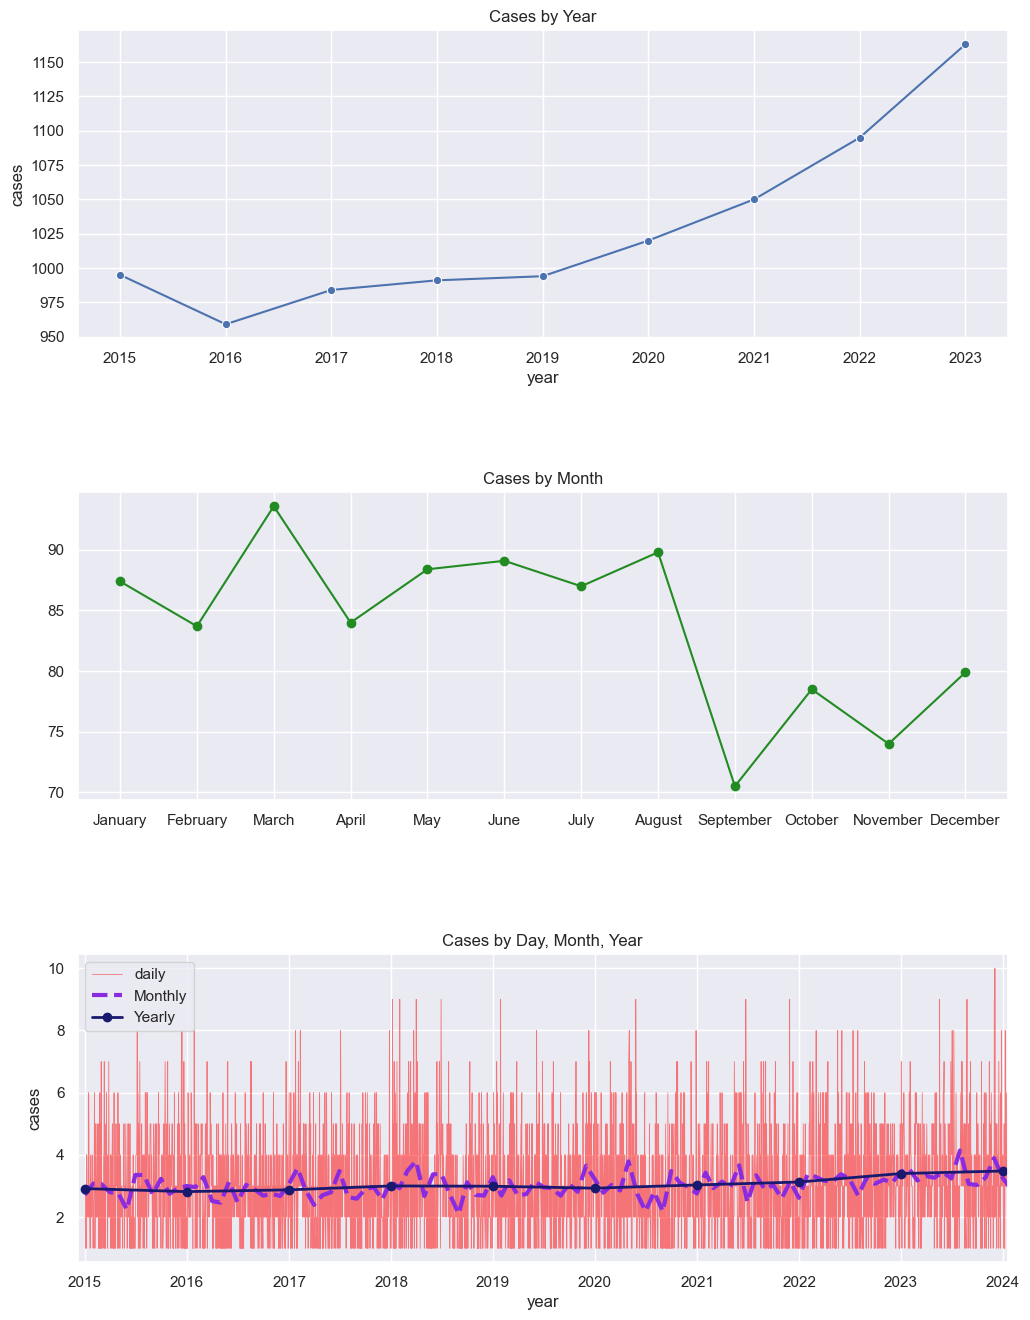

In [29]:
cases_x_month = fpsd.groupby('year').month.value_counts().reset_index()
cases_x_month  = cases_x_month .groupby('month')['count'].mean()
cases_by_date = pd.DataFrame(fpsd.date.value_counts()).sort_index()

sns.set(style='darkgrid')
fig , [ax1,ax2,ax3] = plt.subplots(nrows=3,figsize=(12,16))
plt.subplots_adjust(hspace=0.50)

sns.lineplot(fpsd_pop_prop,x='year',y='cases',marker='o',ax=ax1).set_title('Cases by Year')

ax2.plot(cases_x_month, marker='o', color='forestgreen')
ax2.title.set_text('Cases by Month')

ax3.title.set_text('Cases by Day, Month, Year')
ax3.plot(cases_by_date['count'],marker='',linestyle='-',
         color='Red',alpha=0.5,linewidth=0.6,label='daily')
ax3.plot(cases_by_date['count'].resample('M',label='left').mean(),linestyle='--',linewidth=3,
         color='blueviolet',label='Monthly')

ax3.plot(cases_by_date['count'].resample('Y',label='left').mean(),linestyle='-',marker='o',linewidth=2,
         color='midnightblue',label='Yearly')
ax3.legend()
ax3.set_ylabel('cases')
ax3.set_xlabel('year')
ax3.set_xlim(16410,19740)

Le __razze più coinvolte__ nei casi di "fatal police shooting" sono:

- __neri/afroamericani__
- __nativi americani__

<Axes: title={'center': 'Year Fpsd Cases by Race Frequency'}, xlabel='year', ylabel='frequency'>

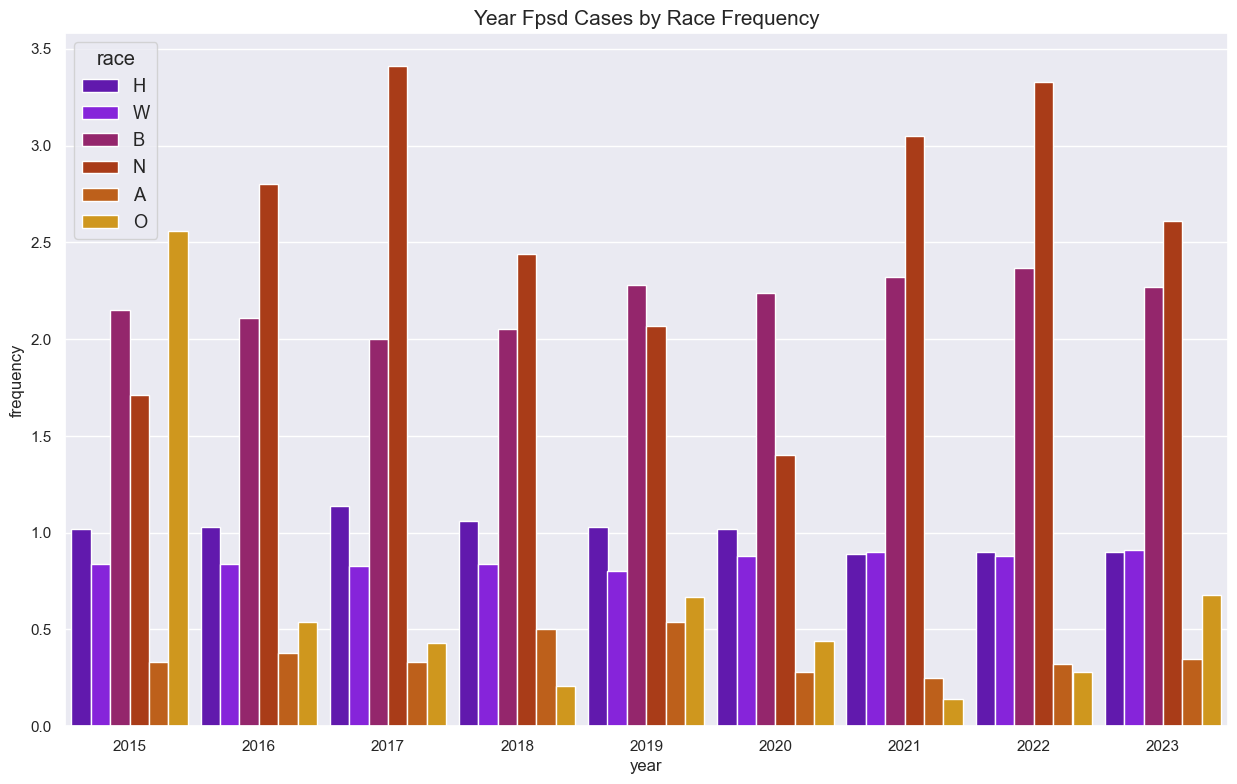

In [30]:
year_cases_freq.index = year_cases_freq.index.astype(int)
year_cases_freq_plot = year_cases_freq.unstack().reset_index().rename(columns={0:'frequency'})
plt.figure(figsize=(15,9))
plt.title('Year Fpsd Cases by Race Frequency',fontsize=15)
sns.set(font_scale=1.2)
sns.barplot(year_cases_freq_plot,x='year',y='frequency',hue='race',width=0.9,palette='gnuplot')

Le __razze__ più coinvolte per anno nei casi di __"fatal police shooting"__ in cui le __body camera__ delle forze di polizia __erano inattive__ e le __vittime erano disarmate__ sono in percentuale:

- __neri/afroamericani__ tra il 3% ed il 12%
- __ispanici__ tra il 3% ed il 10%
- __bianchi__ tra l'1% ed il 5%

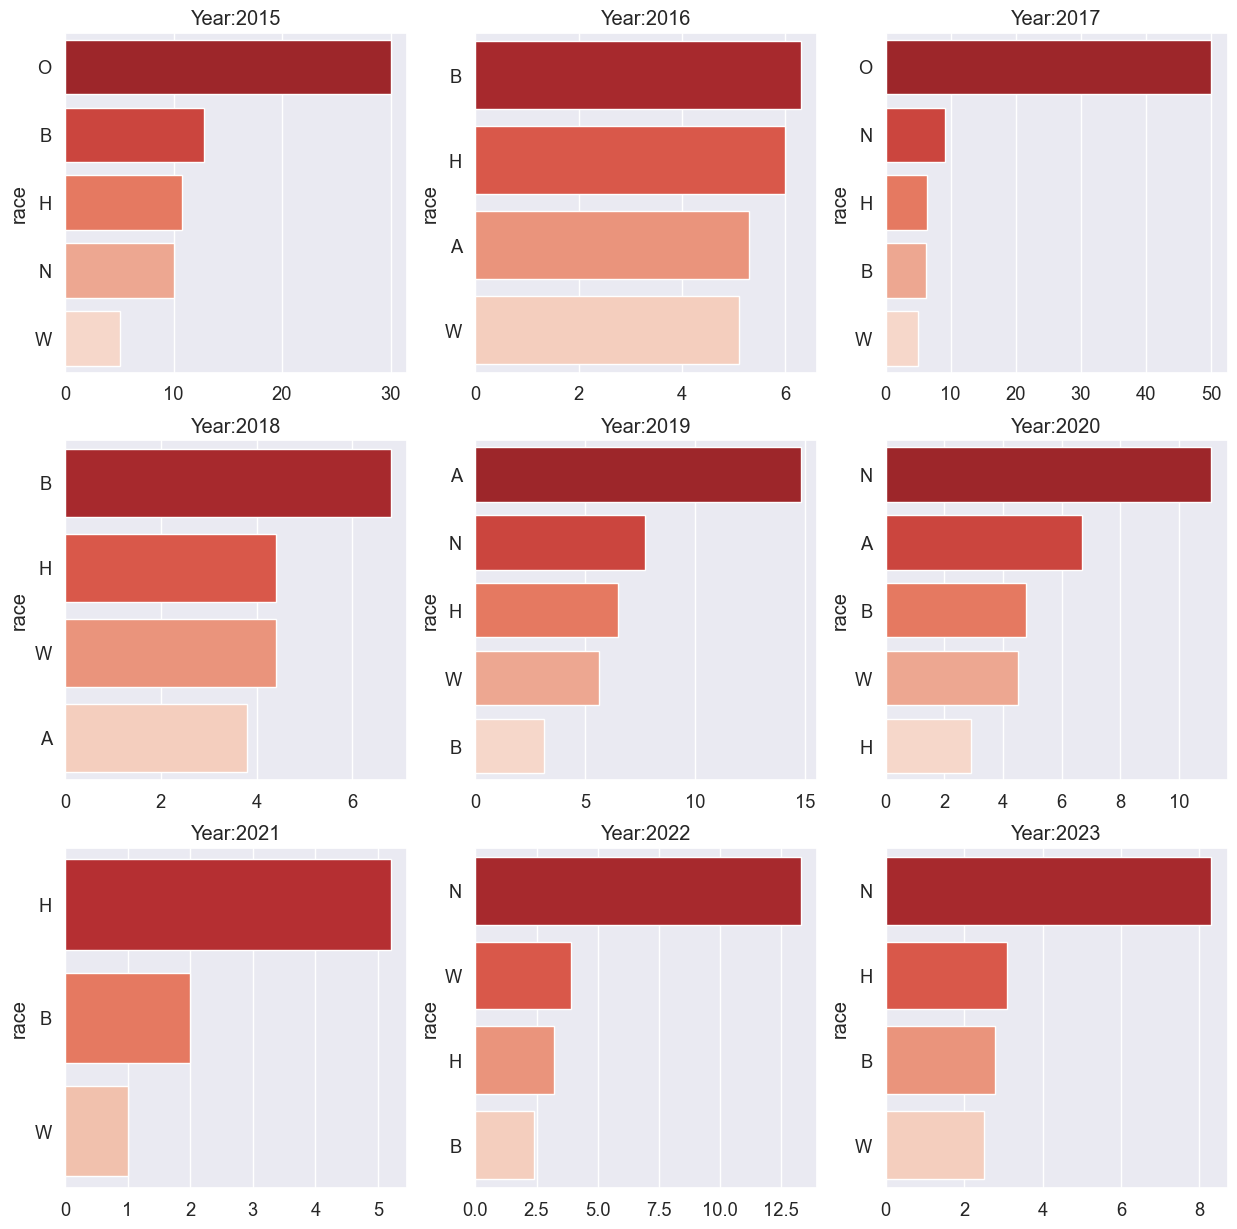

In [31]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for n,year in enumerate(years):
    bc_race_cases_plot = bc_race_cases(year,False).set_index('race').drop('body_camera',axis=1)['freq']
    bc_race_cases_plot = bc_race_cases_plot.reset_index().set_index('race')
    sns.barplot(x=bc_race_cases_plot['freq'],y=bc_race_cases_plot.index,ax=axes[n],palette='Reds_r')
    axes[n].set(xlabel='')
    axes[n].set_title(f'Year:{year}')
    

Gli __stati__ con il __più alto tasso medio__ di casi di __"fatal police shooting"__ tra il 2015 ed il 2023 sono:

- __New Mexico__
- __Alaska__

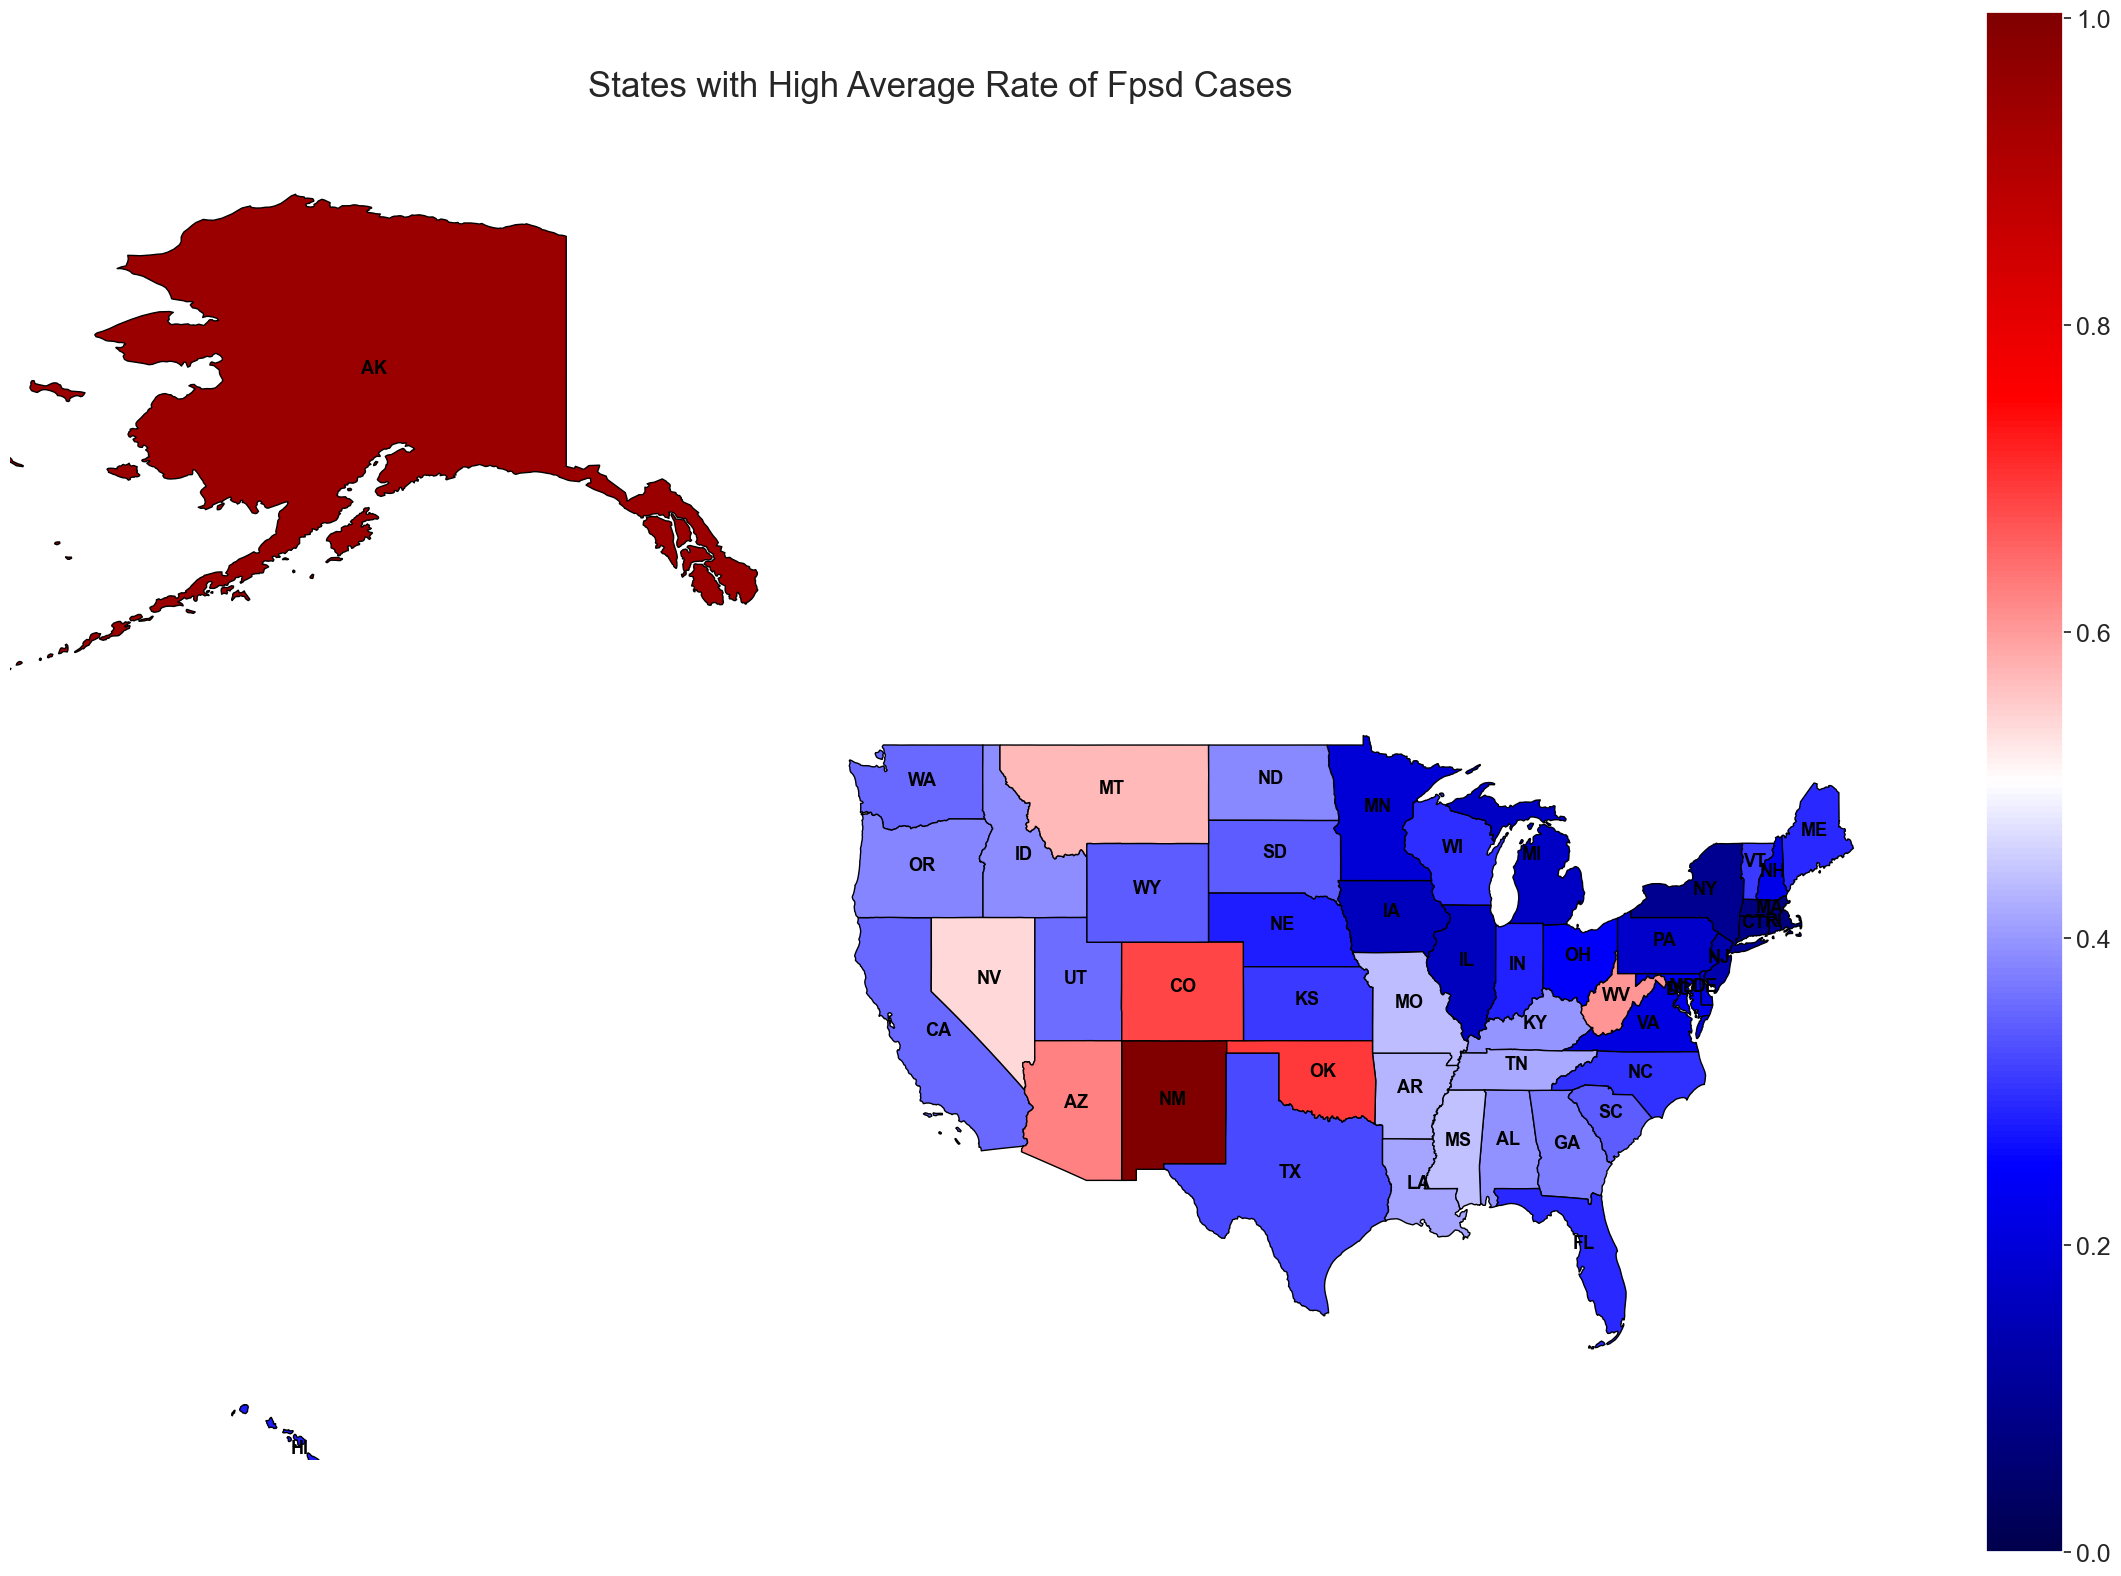

In [32]:
usa_map = usa_map.drop(usa_map.loc[usa_map.NAME=='Puerto Rico'].index)
average_cases_pop = pop_cases_proportion.groupby('state')['pop_cases_prop'].median().sort_values(ascending=False).reset_index()
geo_plot_cases = usa_map.merge(average_cases_pop,how='left',left_on='STUSPS',right_on='state')

norm = plt.Normalize(0,geo_plot_cases.pop_cases_prop.max())
cmap = cm.ScalarMappable(norm=norm,cmap='seismic')
colors = plt.cm.seismic(norm(geo_plot_cases.pop_cases_prop))

fig , ax = plt.subplots(figsize=(30,20))
geo_plot_cases.plot(ax=ax,edgecolor='black',color=colors)
plt.title('States with High Average Rate of Fpsd Cases',fontsize=25)
plt.colorbar(cmap,ax=ax).ax.tick_params(labelsize=18)
ax.set_xlim(-173, -66)
ax.set_ylim(20, 75)
ax.axis('off')
geo_plot_cases.apply(lambda x: ax.annotate(text=x['STUSPS'], xy=x.geometry.centroid.coords[0], ha='center',fontsize=13,color='black',weight='bold'), axis=1);

In relazione ad ogni anno tra il 2015 ed il 2023, gli __stati__ con il __più alto tasso di casi__ di "fatal police shooting" __per singolo anno__ sono:

- il __Wyoming__ nel 2015 e nel 2022 (presenta il picco più alto raggiunto nel 2022)
- l'__Alaska__ tra il 2016 ed il 2017  e nel 2020
- il __New Mexico__ nel 2018, nel 2021 e nel 2023

C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'States with High Rate of cases by Year'}, xlabel='year', ylabel='pop_cases_prop'>

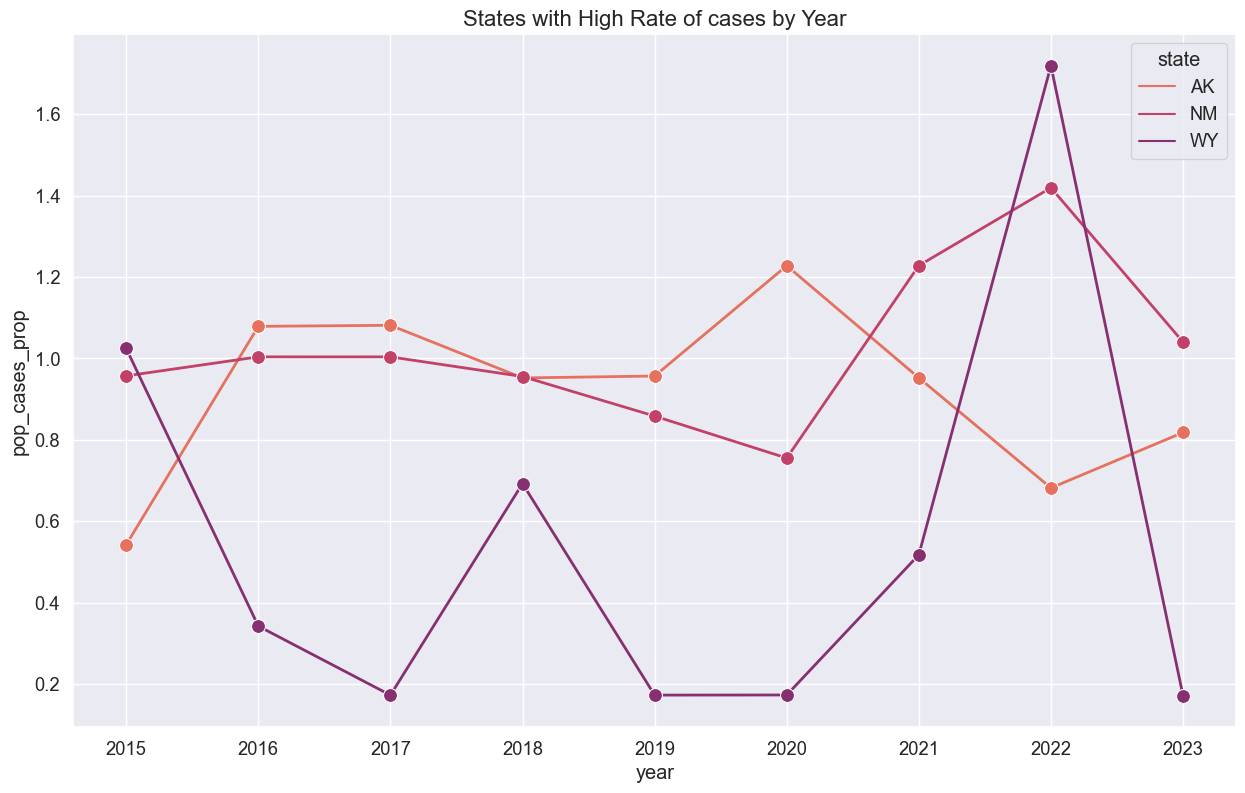

In [33]:
# estrazione del nome degli stati con più casi in proporzione alla popolazione registrati
states_list = []
for year in years:
    states_prop = pop_cases_proportion.loc[pop_cases_proportion.year==year].sort_values(by='pop_cases_prop',
                                                                                  ascending=False).head(1)
    state = states_prop['state'].to_string(index=False)
    prop = round(states_prop['pop_cases_prop'],2).to_string(index=False)
    states_list.append(state)
states_list = list(set(states_list))

# unione in un dataset unico dei dati sugli stati in esame
plot_list = [] 
for state in states_list:
    plot = pop_cases_proportion.loc[(pop_cases_proportion.state==state)].sort_values(by='pop_cases_prop',ascending=False)
    states_plot = plot[['year','state','pop_cases_prop']].sort_values(by='year')
    plot_list.append(states_plot)

pop_cases_proportion_plot = pd.concat(plot_list)
plt.figure(figsize=(15,9))
plt.title('States with High Rate of cases by Year',fontsize=16)
sns.lineplot(pop_cases_proportion_plot,x='year',y='pop_cases_prop',hue='state',
             palette='flare',marker='o',linewidth=2,markersize=10)
    

Le razze più coinvolte nei casi di "fatal police shooting" dal 2015 al 2023 negli stati con il tasso più alto di casi per anno sono:

- __Neri/Afromericani__
- __Nativi americani__

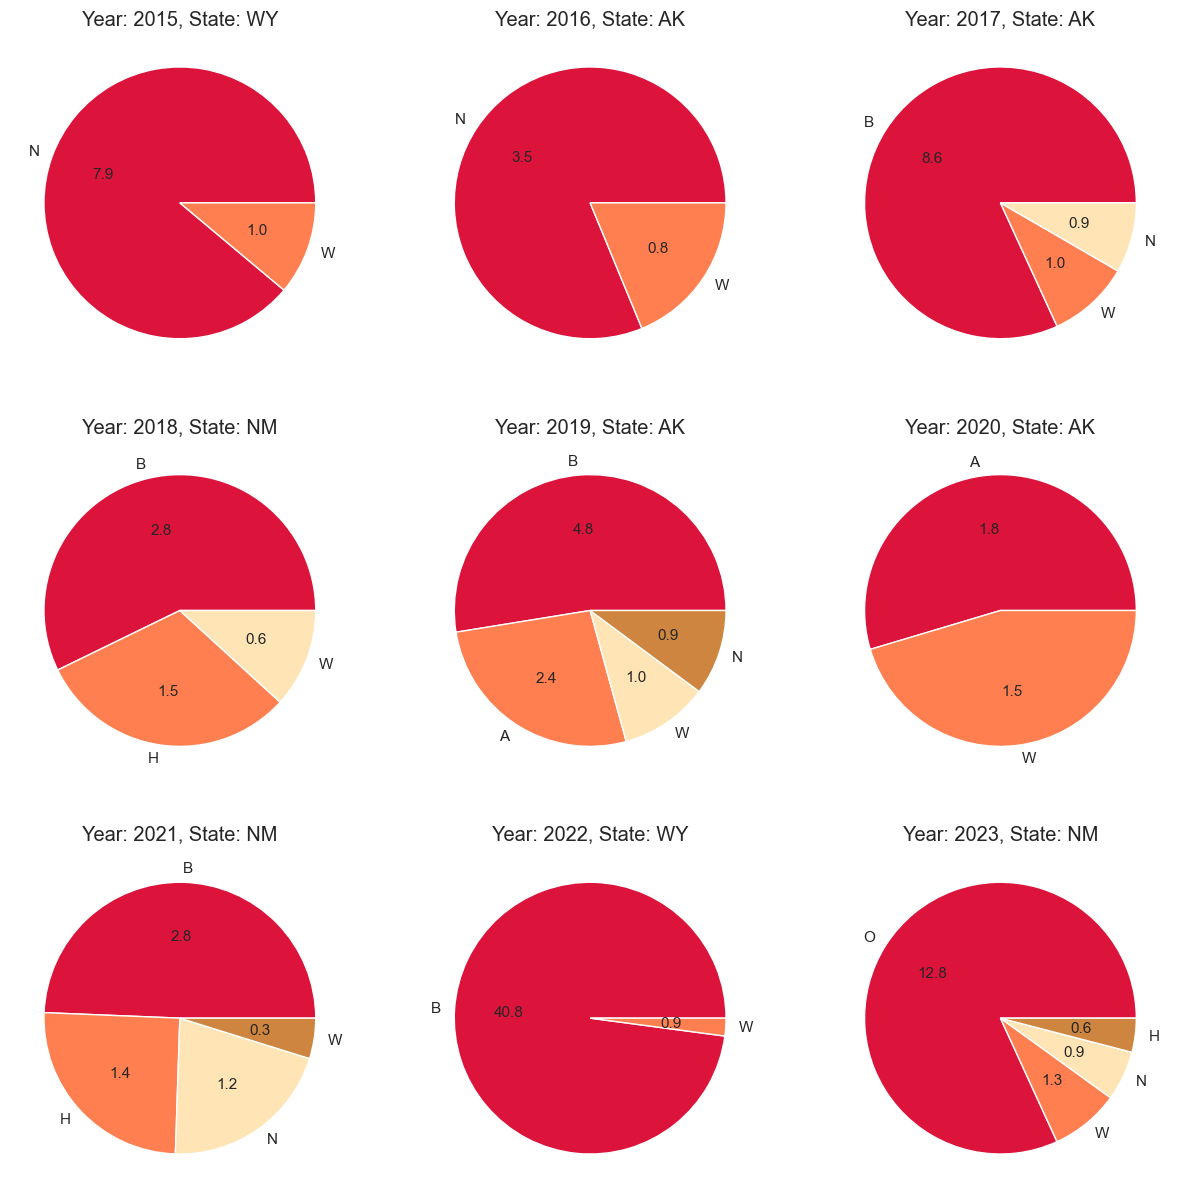

In [34]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for n,year in enumerate(years):
    states_prop = pop_cases_proportion.loc[pop_cases_proportion.year==year].sort_values(by='pop_cases_prop',ascending=False).head(1)
    state = states_prop['state'].to_string(index=False)
    plot_states_max = states_max_prop(state, year).sort_values(by='freq',ascending=False)
    labels = list(plot_states_max.race)
    data = np.array(plot_states_max.freq)
    colors = ['crimson','coral','moccasin','peru','lightsalmon','pink']
    axes[n].pie(data,labels=labels,autopct= lambda x:'{:.1f}'.format(x*data.sum()/100),textprops={'fontsize':11},colors=colors)
    axes[n].set_title(f'Year: {year}, State: {state}')
    axes[n].axis('off')

Tra gli __omicidi__ commessi dai __dipartimenti di polizia__ con il __maggior numero di "fatal police shooting"__ rispetto alla media dal 2015 al 2023, la razza più colpita è quella __Nera/Afroamericana__.

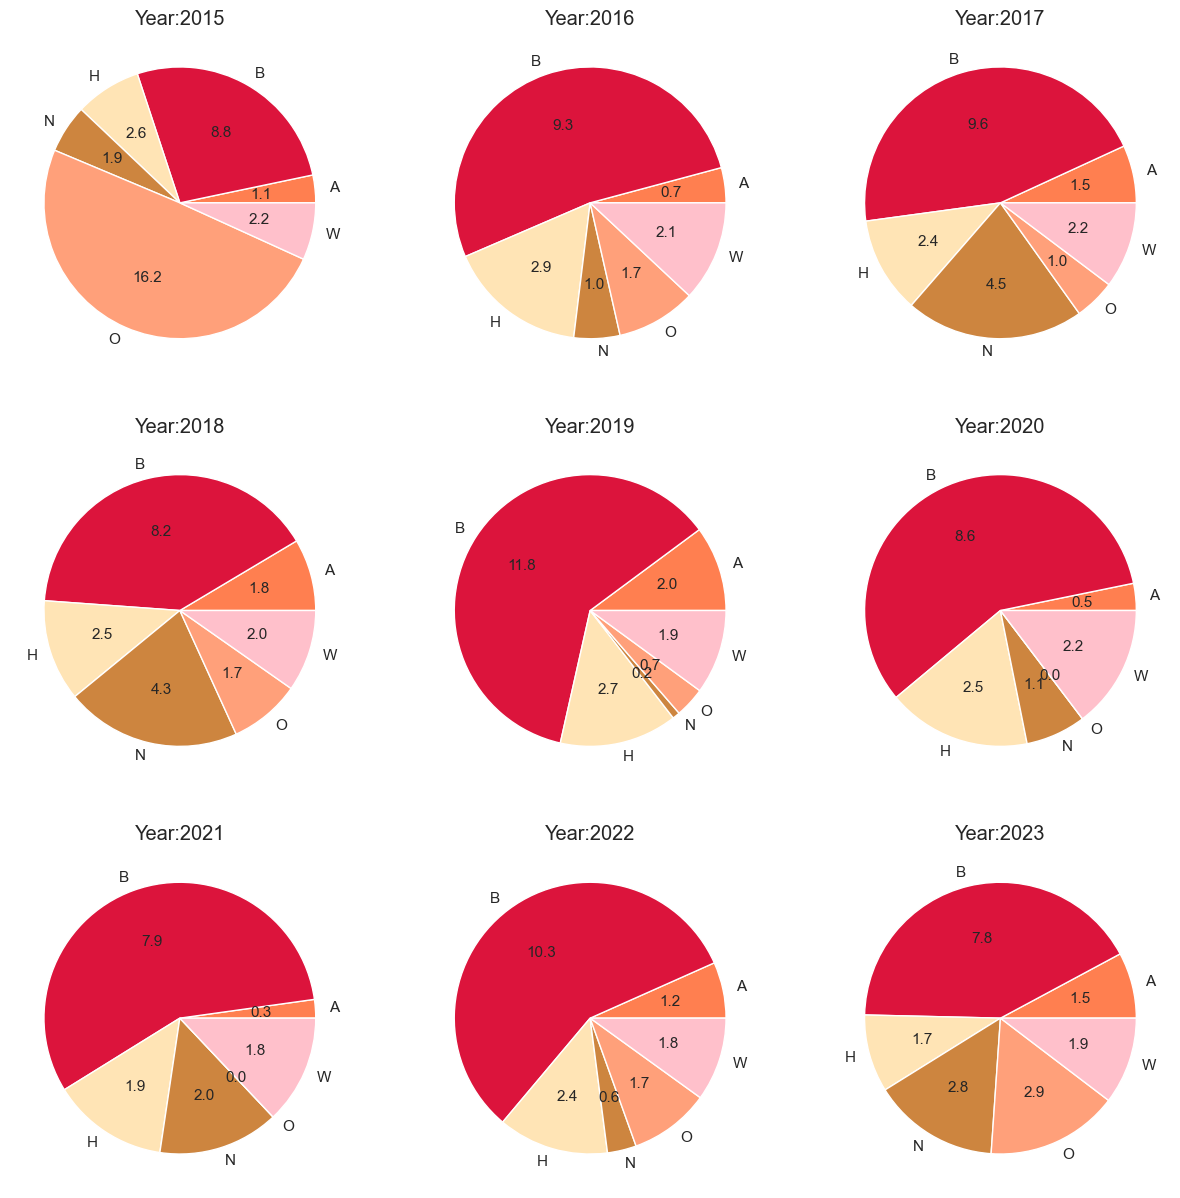

In [35]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()


dep_more_cases_byrace_plot = dep_more_cases_byrace.unstack().reset_index().rename(columns={0:'rate'})

for n,year in enumerate(years):
    plot = dep_more_cases_byrace_plot.loc[dep_more_cases_byrace_plot.year==year]

    labels = list(plot.race)
    data = np.array(plot.rate)
    colors = ['coral','crimson','moccasin','peru','lightsalmon','pink']
    axes[n].pie(data,labels=labels,autopct= lambda x:'{:.1f}'.format(x*data.sum()/100),textprops={'fontsize':11},colors=colors)
    axes[n].set_title(f'Year:{year}')
    axes[n].axis('off')

Il grafico mostra la __correlazione tra i casi di "fatal police shooting" e la percentuale di cittadini sotto la soglia di povertà__ negli stati americani, provando come al crescere del tasso di povertà crescano anche i casi di omicidio per arma da fuoco commessi dalla polizia.

Text(0, 0.5, 'fpsd cases rate')

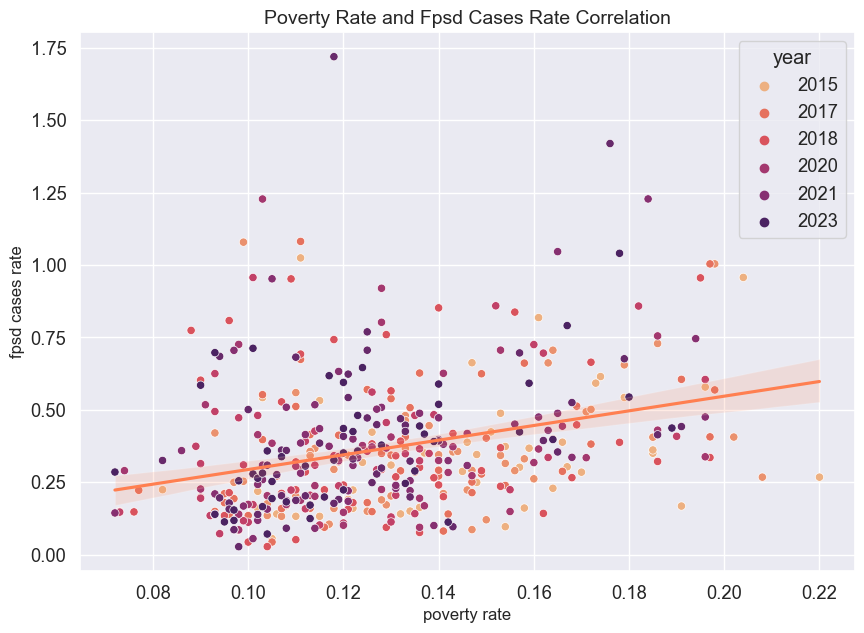

In [36]:
plt.figure(figsize=(10,7))
ax = sns.scatterplot(poverty_x_cases,x='pop_below_poverty',y='pop_cases_prop',hue='year',palette='flare')
sns.regplot(poverty_x_cases,x='pop_below_poverty',y='pop_cases_prop',scatter=False,ax=ax,color='coral')
ax.set_title('Poverty Rate and Fpsd Cases Rate Correlation',fontsize=14)
ax.set_xlabel('poverty rate',fontsize=12)
ax.set_ylabel('fpsd cases rate',fontsize=12)

Il grafico analizza la __correlazione tra la percentuale di cittadini scolarizzati__ negli stati americani __ed i casi di "fatal police shooting"__, mostrando l'__assenza di correlazione__ tra le due variabili.

Text(0, 0.5, 'fpsd cases rate')

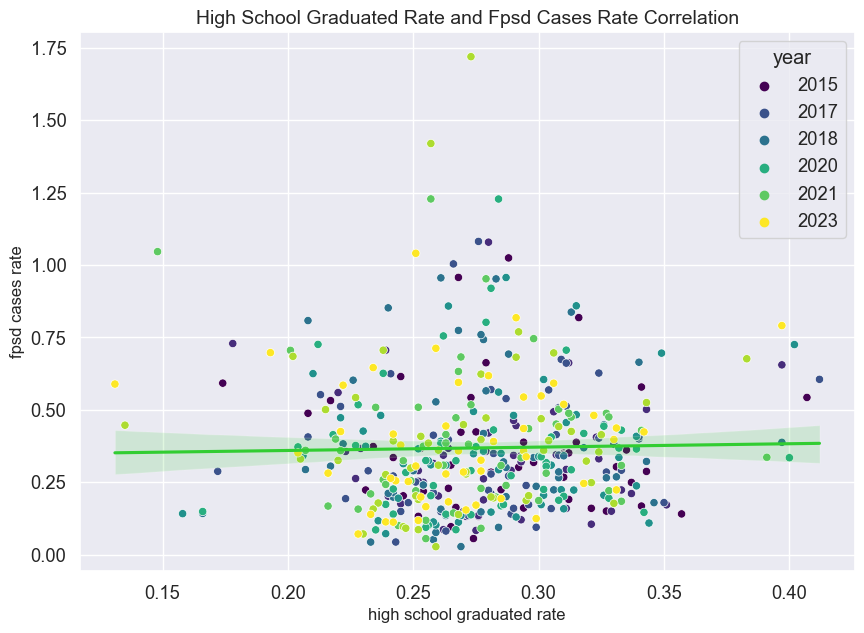

In [37]:
plt.figure(figsize=(10,7))
ax = sns.scatterplot(education_x_cases,x='High school graduate (includes equivalency)',
                     y='pop_cases_prop',hue='year',palette='viridis')
sns.regplot(education_x_cases,x='High school graduate (includes equivalency)',
            y='pop_cases_prop',scatter=False,ax=ax,color='limegreen')
ax.set_title('High School Graduated Rate and Fpsd Cases Rate Correlation',fontsize=14)
ax.set_xlabel('high school graduated rate',fontsize=12)
ax.set_ylabel('fpsd cases rate',fontsize=12)

Analizzando la percentuale di cittadini senza assicurazione per razza dal 2015 al 2023 si evince che in entrambi i campioni di stati con un numero maggiore e minore di cittadini senza assicurazione sanitaria dal 2015 al 2023:

- le categorie 'Hispanic' e 'Other' rappresentano la maggioranza delle persone senza assicurazione sanitaria
- la categoria 'White' presenta in entrambi i casi il minor numero di non assicurati


Text(0, 0.5, 'uninsured percentage')

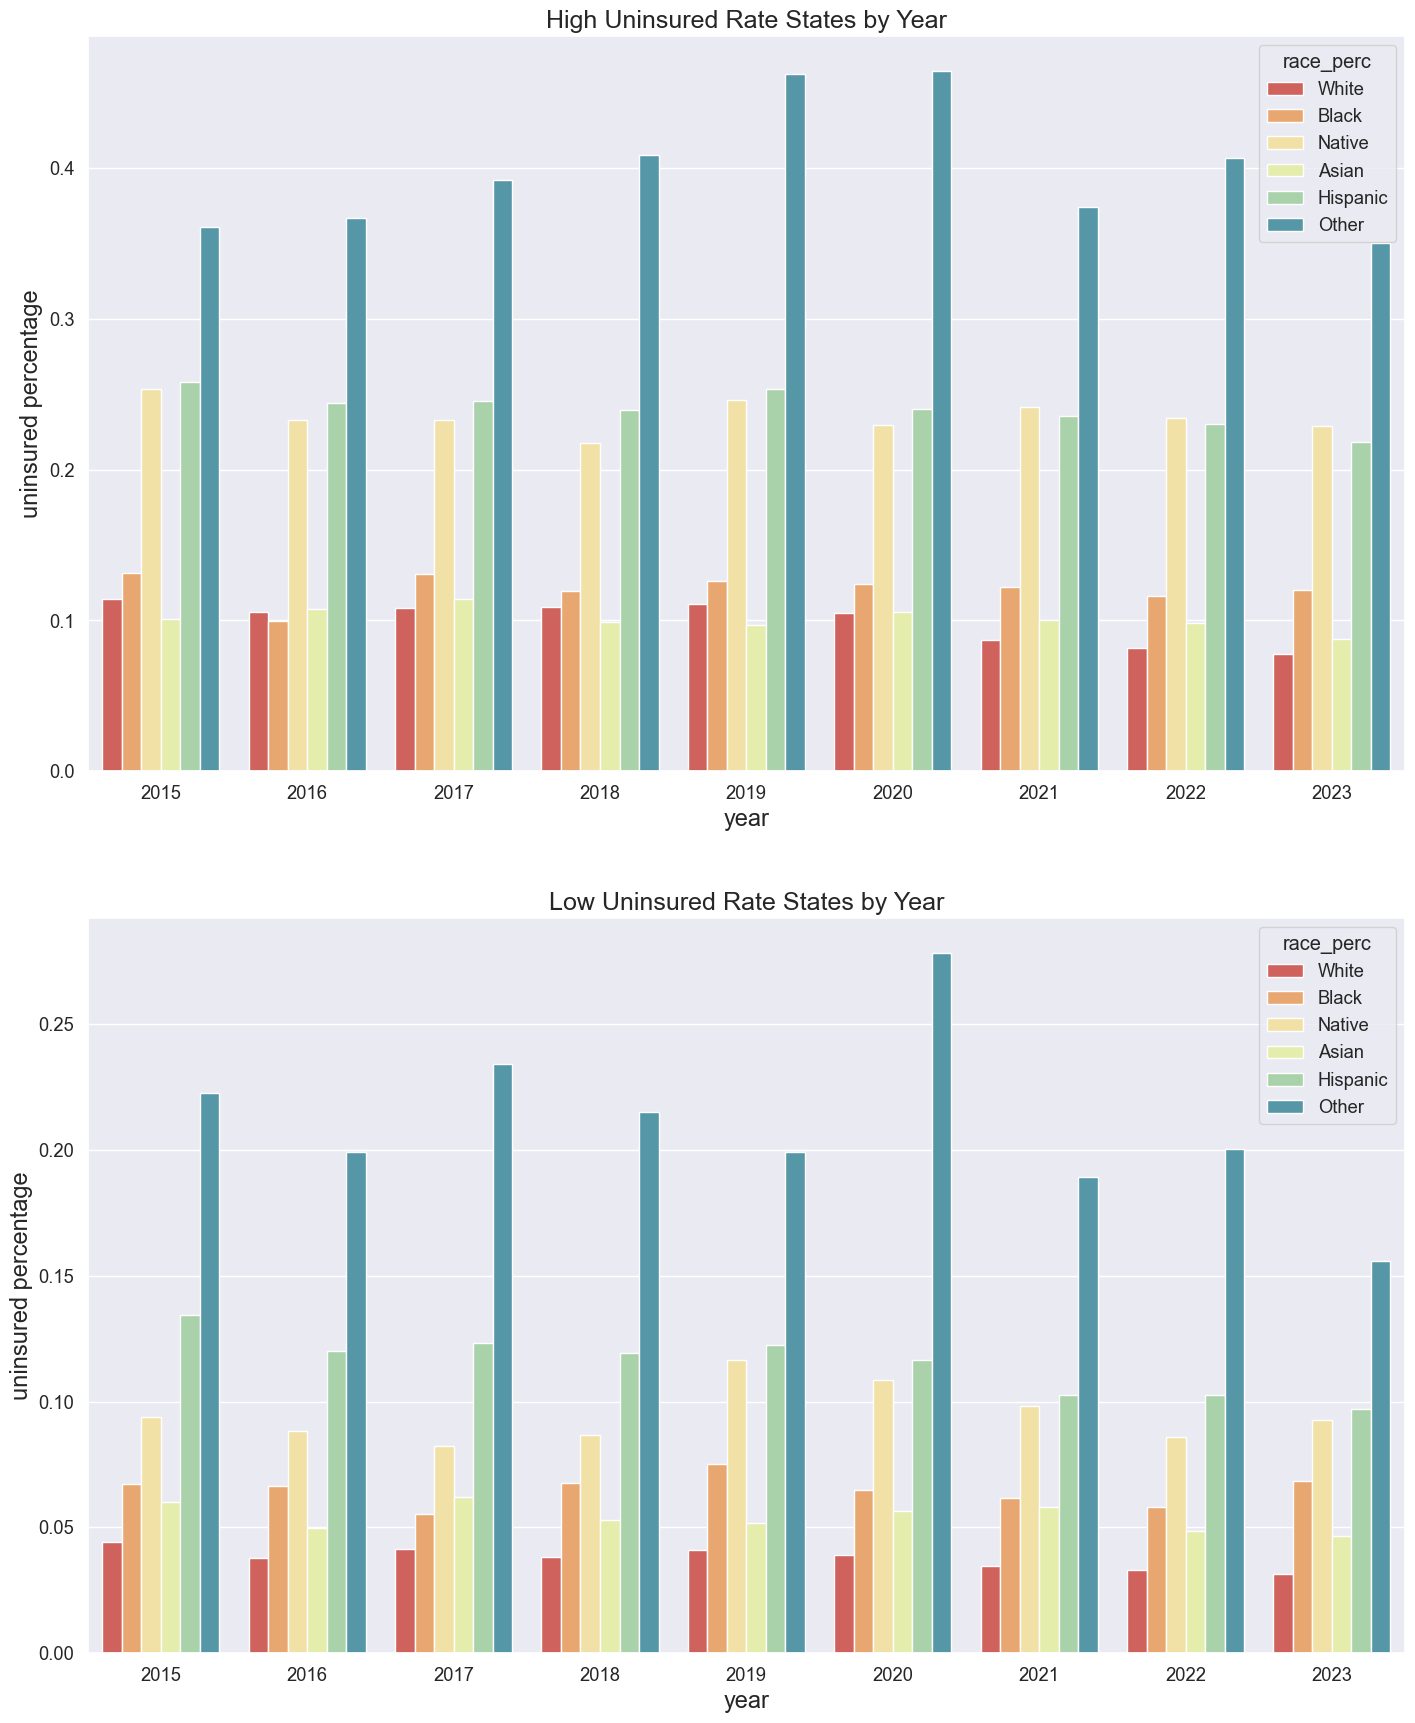

In [38]:
high_uninsured_plot = pd.DataFrame(high_uninsured_by_race).set_index('year').unstack().reset_index().rename(columns={'level_0':'race_perc',0:'uninsured_perc'})
high_uninsured_plot['race_perc'] = high_uninsured_plot.race_perc.str.split('_').str[0]

low_uninsured_plot = pd.DataFrame(low_uninsured_by_race).set_index('year').unstack().reset_index().rename(columns={'level_0':'race_perc',0:'uninsured_perc'})
low_uninsured_plot['race_perc'] = low_uninsured_plot.race_perc.str.split('_').str[0]


fig, [ax1,ax2] = plt.subplots(nrows=2,figsize=(17,21))
ax1.set_title('High Uninsured Rate States by Year',fontsize=18)
sns.barplot(high_uninsured_plot,x='year',y='uninsured_perc',hue='race_perc',palette='Spectral',ax=ax1)
ax1.set_xlabel('year',fontsize=17)
ax1.set_ylabel('uninsured percentage',fontsize=17)

ax2.set_title('Low Uninsured Rate States by Year',fontsize=18)
sns.barplot(low_uninsured_plot,x='year',y='uninsured_perc',hue='race_perc',palette='Spectral',ax=ax2)
ax2.set_xlabel('year',fontsize=17)
ax2.set_ylabel('uninsured percentage',fontsize=17)

Il grafico analizza la __correlazione tra la percentuale di cittadini senza assicurazione sanitaria ed i casi di "fatal police shooting"__ dal 2015 al 2023, mostrando come al crescere della percentuale di cittadini non assicurati crescano anche i casi di "fatal police shooting".

Text(0, 0.5, 'fpsd cases rate')

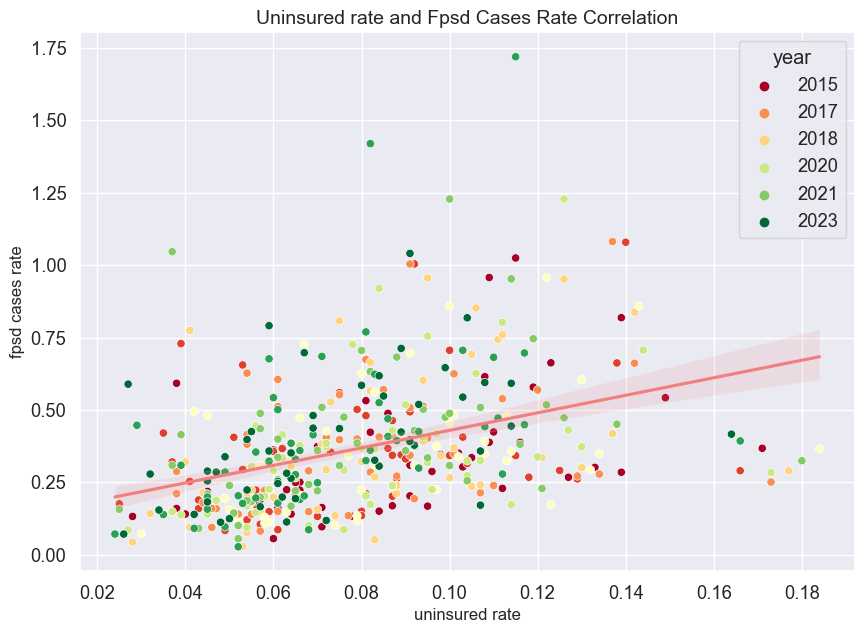

In [39]:
plt.figure(figsize=(10,7))
ax = sns.scatterplot(uninsured_x_cases,x='Population',y='pop_cases_prop',hue='year',palette='RdYlGn')
sns.regplot(uninsured_x_cases,x='Population',
            y='pop_cases_prop',scatter=False,ax=ax,color='lightcoral')
ax.set_title('Uninsured rate and Fpsd Cases Rate Correlation',fontsize=14)
ax.set_xlabel('uninsured rate',fontsize=12)
ax.set_ylabel('fpsd cases rate',fontsize=12)

***

### Conclusioni

Il fenomeno dei "fatal police shooting" ha subito un incremento dal 2015 al 2023 negli Stati Uniti, raggiungendo il suo picco nel 2023, caratterizzato dalla crescita esponenziale delle vittime e dal continuo attestarsi di episodi di razzismo.

Nella maggior parte dei casi, in relazione alla popolazione ed alla razza di appartenenza, le vittime collegate a questi fenomeni non appartengono alla popolazione bianca e non appartengono a contesti sociali economicamente stabili.

Come dimostrato dall'analisi dei dipartimenti di polizia più coinvolti nel fenomeno del "fatal police shooting", la maggior parte delle vittime appartiene alla popolazione Nera/Afroamericana, Ispanica o dei Nativi americani, che rappresentano delle piccole minoranze sul territorio statunitense rispetto alla maggioranza bianca della popolazione.

